## Overview
Measurments of EMG and force were taken in a forearm exercise. The data is divided in two types of muscle activity: intermitent and fatigue. In this python notebook we will analyze the intermitent data. The fatigue program has already been explained in the previous notebook. The recordings to be analyzed can be found in our GitHub repository (https://github.com/emckiernan/electrophys). Before carrying out this analysis practical, students should first do the 'Graphing and exploring EMG data' and 'Filtering and analyzing EMG data' practicals from this series.

## Setting up the notebook

We begin by setting up the Jupyter notebook and importing the Python modules for plotting figures, reading the data and analyzing it.

In [1]:
import os
import scipy as sc
from scipy import signal
from scipy.optimize import curve_fit
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import wave
import pandas as pd

## 1.- Importing data

In [3]:
sr_fatigue_l, fatigue_l = scipy.io.wavfile.read("./S1_EMG_leftHand_gripFatigue.wav", "r")
sr_fatigue_r, fatigue_r = scipy.io.wavfile.read("./S1_EMG_rightHand_gripFatigue.wav", "r")

In [4]:
sr_intermitent_l,intermitent_l = scipy.io.wavfile.read("./S1_EMG_leftHand_gripIntermittent.wav", "r")
sr_intermitent_r,intermitent_r = scipy.io.wavfile.read("./S1_EMG_rightHand_gripIntermittent.wav", "r")

In [6]:
# Read the csv file of the force recordings
force=pd.read_csv("EMG_Force.csv")

In [7]:
f_time=force["Time"].to_numpy()
f_fatigue_l= force["Left_hand_fatigue"].to_numpy()
f_fatigue_l= f_fatigue_l[~np.isnan(f_fatigue_l)]
f_fatigue_r=force["Right_hand_fatigue"].to_numpy()
f_fatigue_r= f_fatigue_r[~np.isnan(f_fatigue_r)]
f_intermitent_l=force["Left_hand_intermittent"].to_numpy()
f_intermitent_l=f_intermitent_l[~np.isnan(f_intermitent_l)]
f_intermitent_r=force["Right_hand_intermittent"].to_numpy()
f_intermitent_r=f_intermitent_r[~np.isnan(f_intermitent_r)]

## 2.- Plotting the data

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/305817537.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage [$\mu V$]')


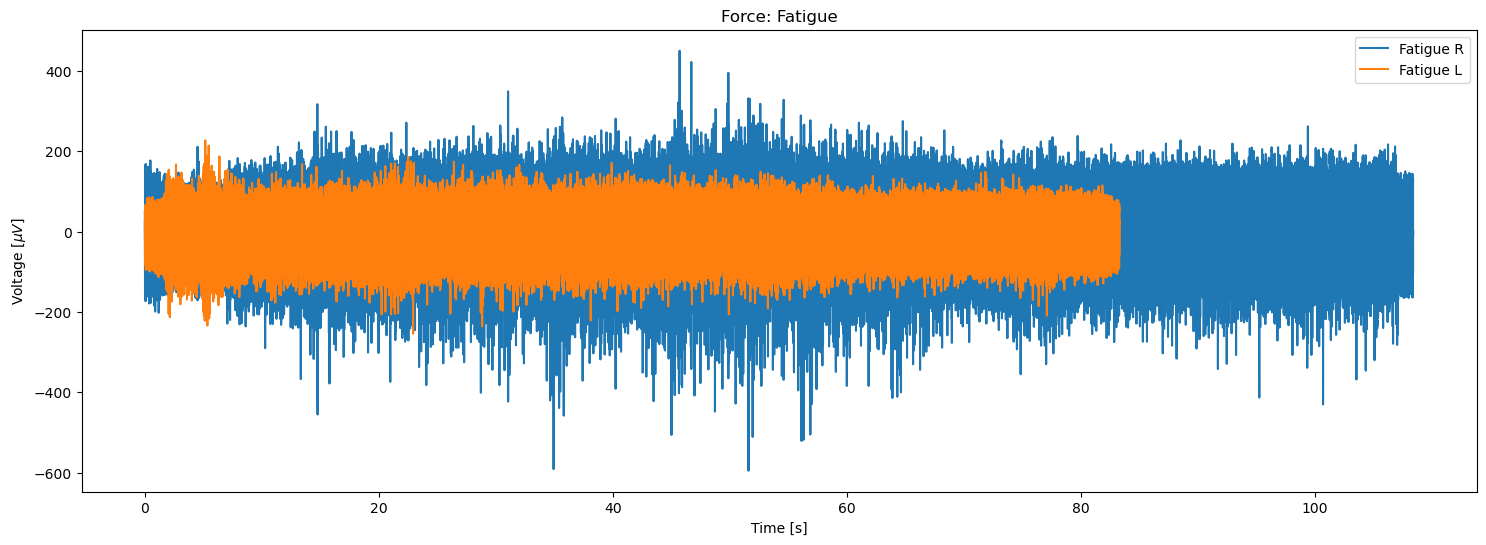

In [8]:
plt.figure(figsize=(18,6))
plt.title("Force: Fatigue")

plt.plot(np.linspace(0,len(fatigue_r)/sr_fatigue_r,num=len(fatigue_r)),fatigue_r,label="Fatigue R")
plt.plot(np.linspace(0,len(fatigue_l)/sr_fatigue_l,num=len(fatigue_l)),fatigue_l,label="Fatigue L")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Voltage [$\mu V$]')
plt.show;

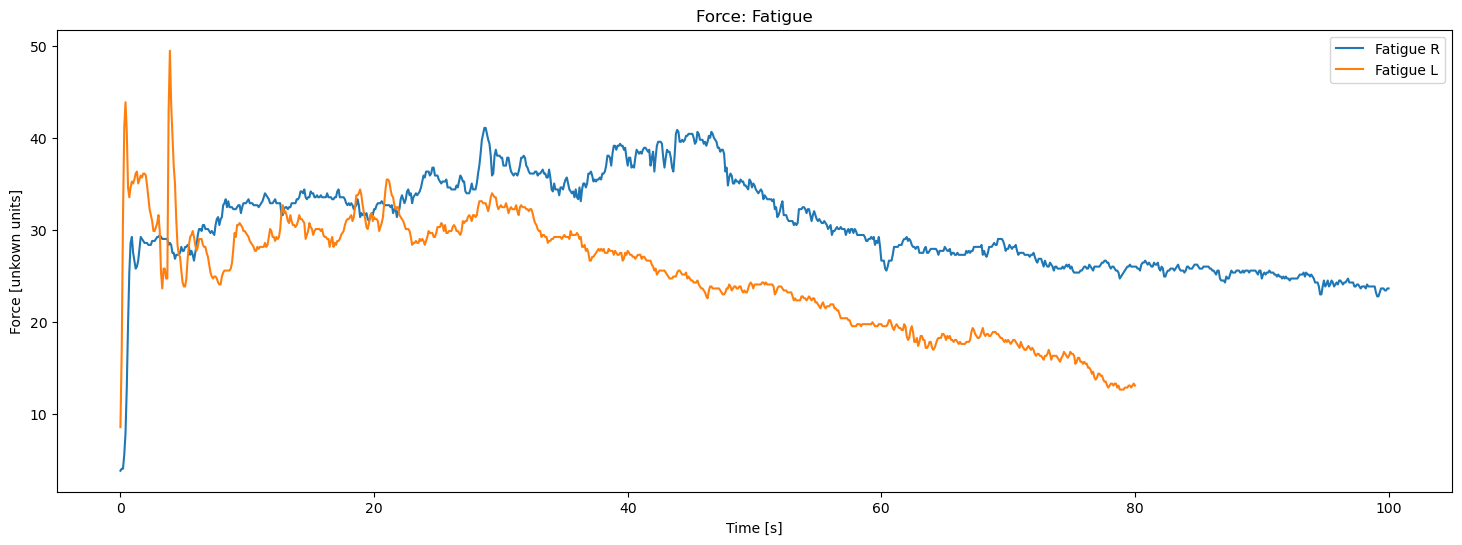

In [9]:
plt.figure(figsize=(18,6))
plt.title("Force: Fatigue")
plt.plot(f_time[0:len(f_fatigue_r)],f_fatigue_r,label="Fatigue R")
plt.plot(f_time[0:len(f_fatigue_l)],f_fatigue_l,label="Fatigue L")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/2262863647.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage [$\mu V$]')


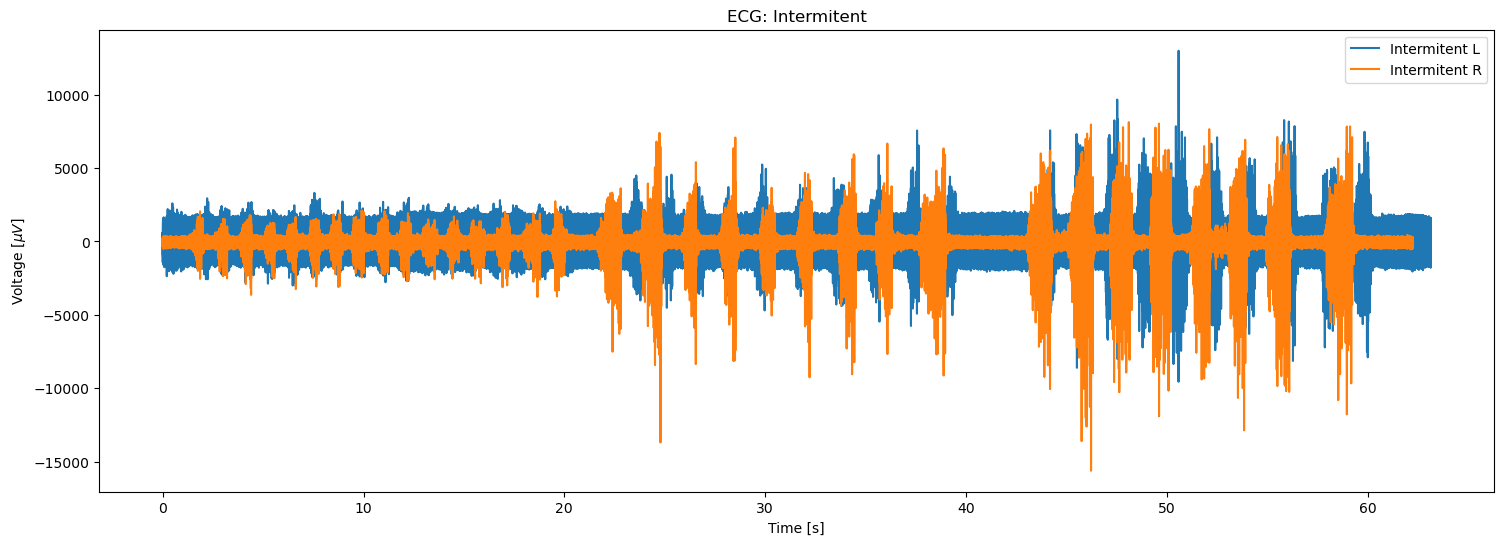

In [10]:
plt.figure(figsize=(18,6))
plt.title("ECG: Intermitent")
plt.plot(np.linspace(0,len(intermitent_l)/sr_intermitent_l,num=len(intermitent_l)),intermitent_l,label="Intermitent L")
plt.plot(np.linspace(0,len(intermitent_r)/sr_intermitent_r,num=len(intermitent_r)),intermitent_r,label="Intermitent R")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Voltage [$\mu V$]')
plt.show;

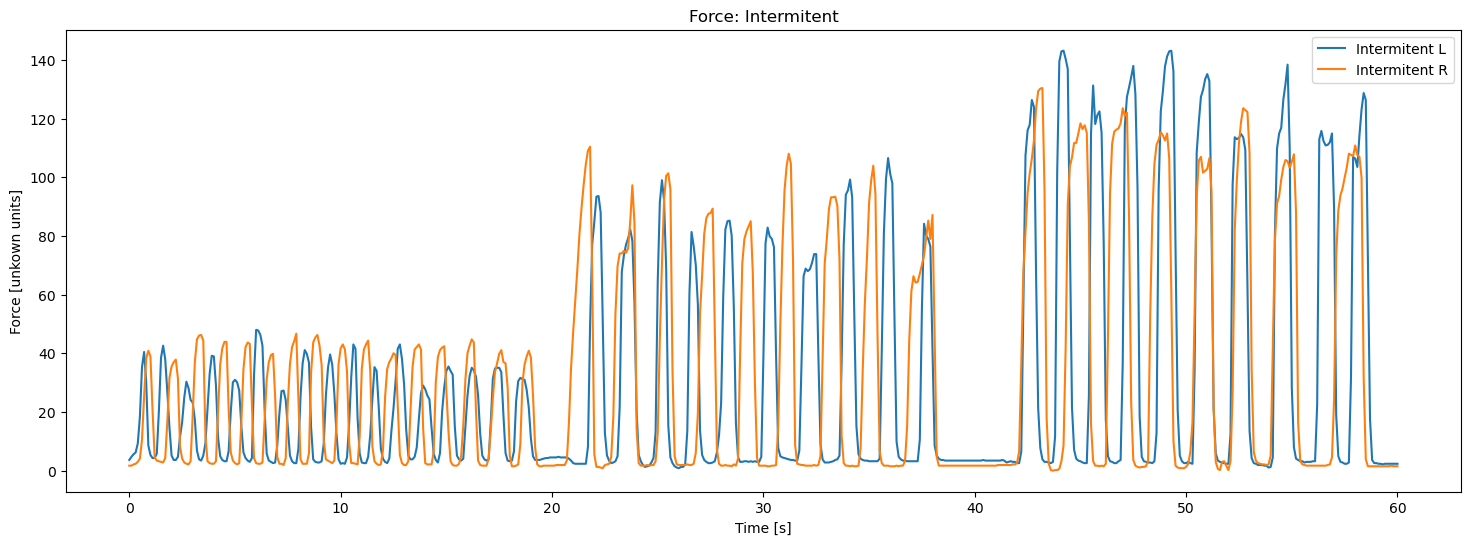

In [11]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent")
plt.plot(f_time[0:len(f_intermitent_r)],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[0:len(f_intermitent_l)],f_intermitent_r,label="Intermitent R")
plt.legend()

plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

Since we don't have the information of the sensor and how it has been calibrated, we can't be certain of the units used in the force measurements.

## 3.- Graphing the intermetent measurments

In [12]:
#The EMG data is larger than the force data. 
# First we need to adjust both arrays.
# The offset is calculated 
offset_i_l=abs(f_time[len(f_intermitent_l)-1]-len(intermitent_l)/sr_intermitent_l)

In [13]:
# We establish a delay time.
#Feel free to play with this value until you are certain that both lines coincide
a_i_l=1.58

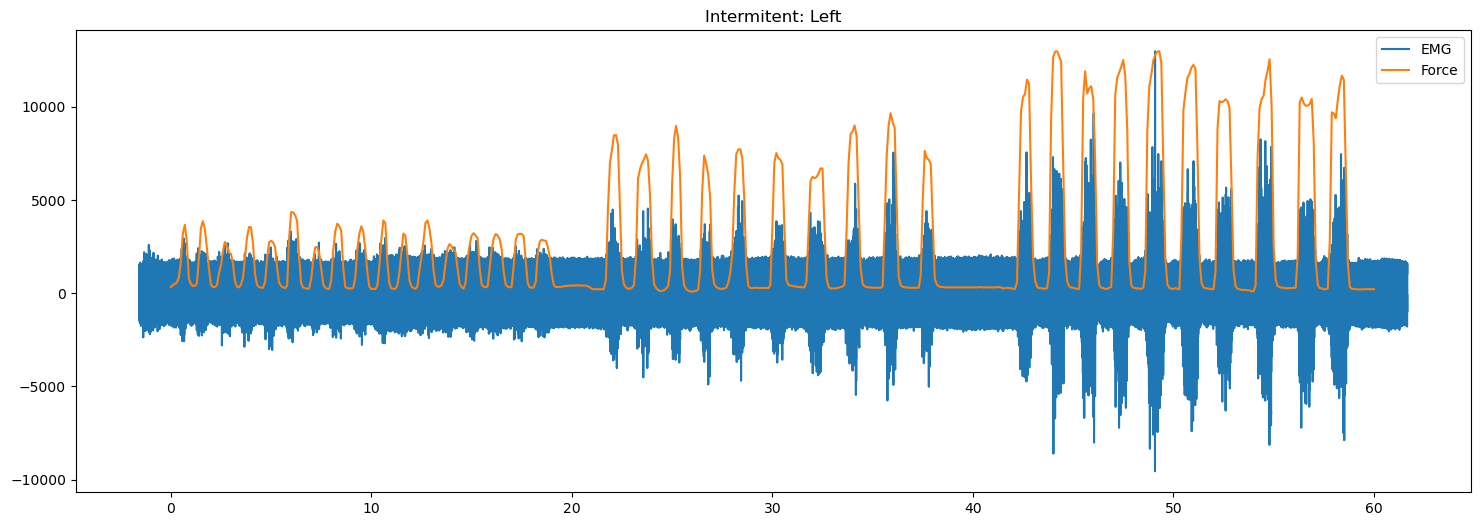

In [14]:
# Plot the left hand intermitent data
plt.figure(figsize=(18,6))
plt.title("Intermitent: Left")
plt.plot(np.linspace(-a_i_l,offset_i_l-a_i_l+f_time[len(f_intermitent_l-1)],num=len(intermitent_l)),intermitent_l,label="EMG")
plt.plot(f_time[0:len(f_intermitent_l)],max(intermitent_l)*f_intermitent_l/max(f_intermitent_l),label="Force")
#plt.xlim(0,10)
plt.legend()
plt.show;

In [15]:
# The offset is calculated 
offset_i_r=abs(f_time[len(f_intermitent_r)-1]-len(intermitent_r)/sr_intermitent_r)

In [16]:
# We establish a delay time.
#Feel free to play with this value until you are certain that both lines coincide
a_i_r=1

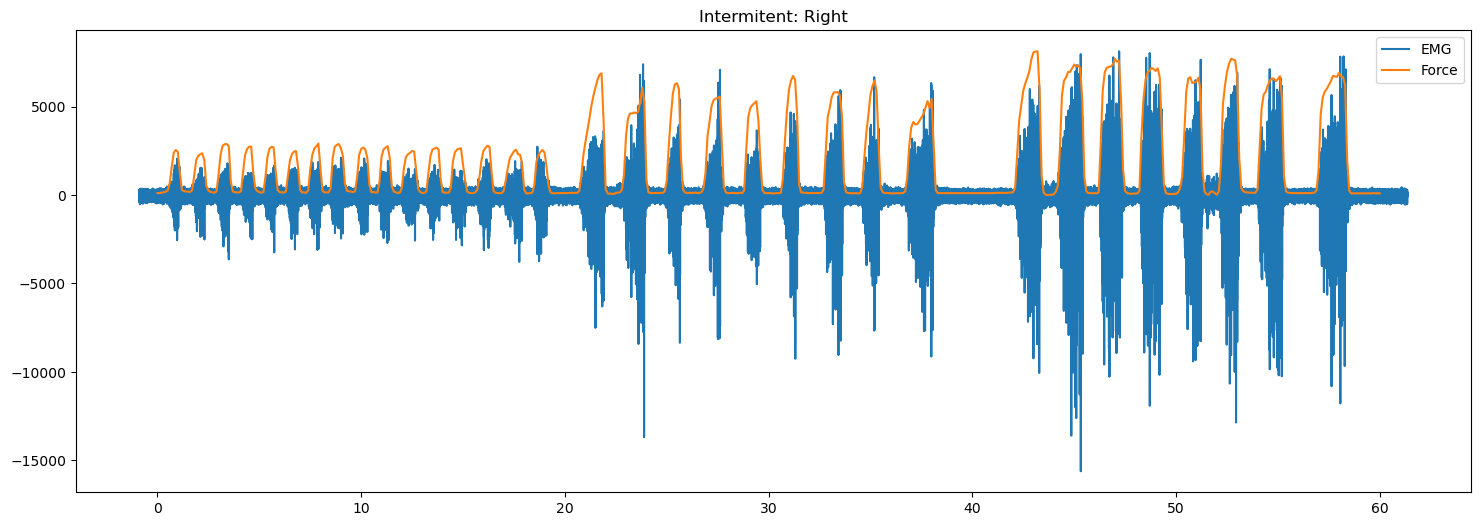

In [17]:
# Plot the left hand intermitent data
plt.figure(figsize=(18,6))
plt.title("Intermitent: Right")
plt.plot(np.linspace(-0.9,offset_i_r-a_i_r+f_time[len(f_intermitent_r-1)],num=len(intermitent_r)),intermitent_r,label="EMG")
plt.plot(f_time[0:len(f_intermitent_r)],max(intermitent_r)*f_intermitent_r/max(f_intermitent_r),label="Force")
#plt.xlim(0,10)
plt.legend()
plt.show;

## 4.- Graphing the fatigue measurments


In [18]:
# The offset is calculated 
offset_f_l=abs(f_time[len(f_fatigue_l-1)]-len(fatigue_l)/sr_fatigue_l)

In [19]:
# We establish a delay time.
#Feel free to play with this value until you are certain that both lines coincide
a_f_l=1.15

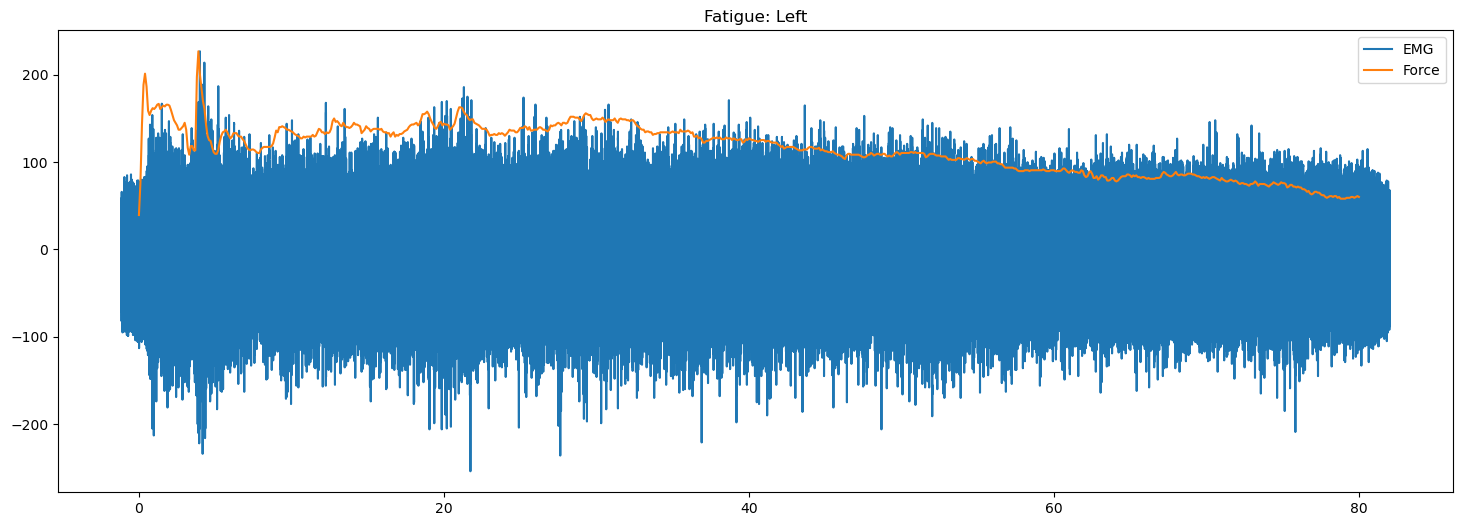

In [20]:
# Plot the left hand fatigue data
plt.figure(figsize=(18,6))
plt.title("Fatigue: Left")
plt.plot(np.linspace(-a_f_l,offset_f_l-a_f_l+f_time[len(f_fatigue_l)-1],num=len(fatigue_l)),fatigue_l,label="EMG")
plt.plot(f_time[0:len(f_fatigue_l)],max(fatigue_l)*f_fatigue_l/max(f_fatigue_l),label="Force")
plt.legend()
#plt.xlim(0,10)
plt.show;

In [21]:
# The offset is calculated 
offset_f_r=abs(f_time[len(f_fatigue_r)-1]-len(fatigue_r)/sr_fatigue_r)

In [22]:
# We establish a delay time.
#Feel free to play with this value until you are certain that both lines coincide
a_f_r=6.3

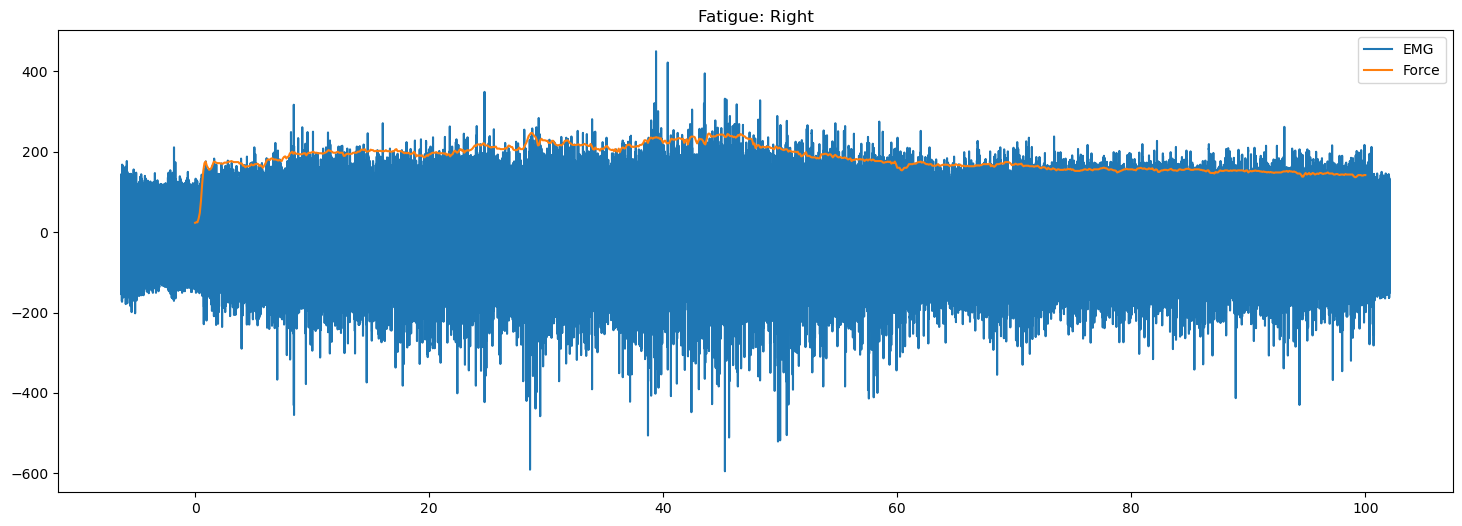

In [23]:
# Plot the left hand intermitent data
plt.figure(figsize=(18,6))
plt.title("Fatigue: Right")
plt.plot(np.linspace(-a_f_r,offset_f_r-a_f_r+f_time[len(f_fatigue_r)-1],num=len(fatigue_r)),fatigue_r,label="EMG")
plt.plot(f_time[0:len(f_fatigue_r)],6*f_fatigue_r,label="Force")
plt.legend()
#plt.xlim(0,10)
plt.show;

## 5.- Filtering the siganls

In [24]:
# Function to delete the 60Hz noise from a given signal
def filtering(x,sr):
    X=fft(x)

    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    
    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside
    
    # Filter out the 60 Hz noise
    for i in range(int(55*T),int(65*T)+1):
        X[i]=0
        X[-i-1]=0
    X2=ifft(X).real
    return X2
    #plt.figure(figsize=(18,6))
    #plt.plot(np.linspace(0,T,num=N),X2)
    #plt.stem(f_oneside, abs(X_oneside), linefmt='b',markerfmt=" ", basefmt="-b")
    #plt.xlabel('Freq (Hz)')
    #plt.ylabel('Normalized FFT Amplitude |X(freq)|')
    #plt.xlim(10,400)
    #plt.show()

In [25]:
intermitent_l=filtering(intermitent_l,sr_intermitent_l)

In [26]:
intermitent_r=filtering(intermitent_r,sr_intermitent_r)

In [27]:
fatigue_l=filtering(fatigue_l,sr_fatigue_l)

In [28]:
fatigue_r=filtering(fatigue_r,sr_fatigue_r)

# 6.-Finding the activation limits in the intermitent signal

## 6.1: First derivative function

One way to find the beginning and ending of the action potential is by analyzing concavities. To do this we must first find the first derivative of the function

In [29]:
#Function to find the first derivative
def der1(array):
    r=[0]
    for i in range(1,len(array)):
        r.append(array[i]-array[i-1])
    return(r)

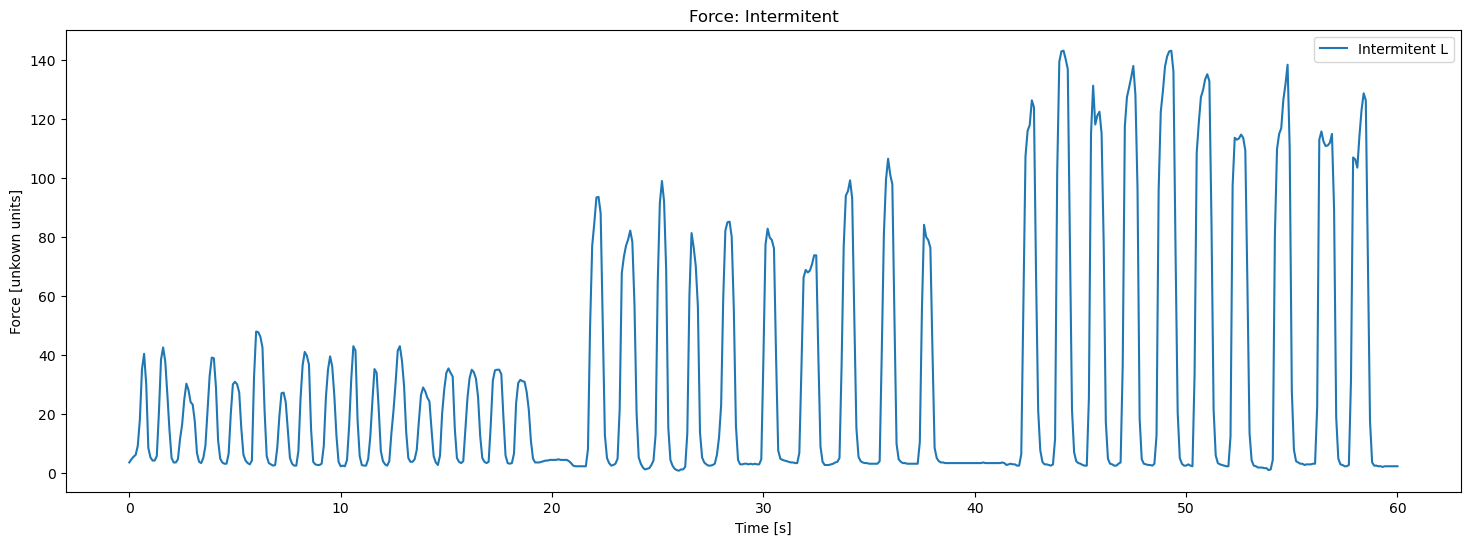

In [30]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent")
plt.plot(f_time[0:len(f_intermitent_l)],f_intermitent_l,label="Intermitent L")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

Now we compute the first derivative to the array graphed above.

In [31]:
f_intermitent_l_prime=der1(f_intermitent_l)

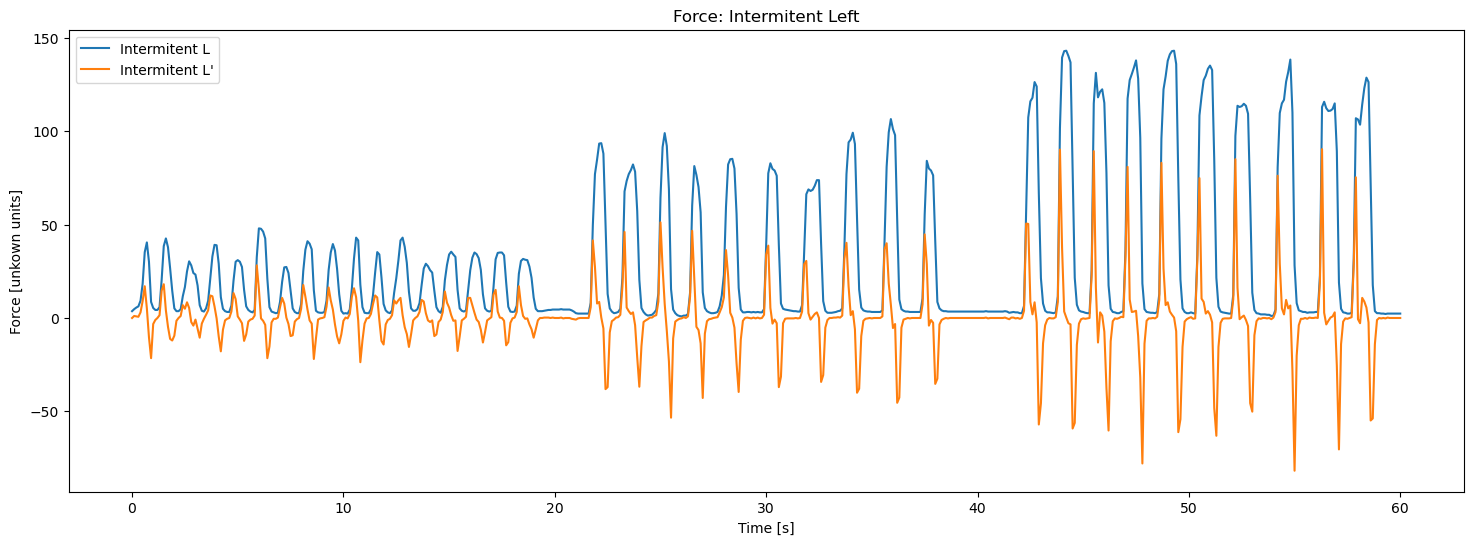

In [32]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_prime,label="Intermitent L'")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

## 6.2: Second derivative function

Now we compute the second derivative

In [33]:
f_intermitent_l_2prime=der1(f_intermitent_l_prime)

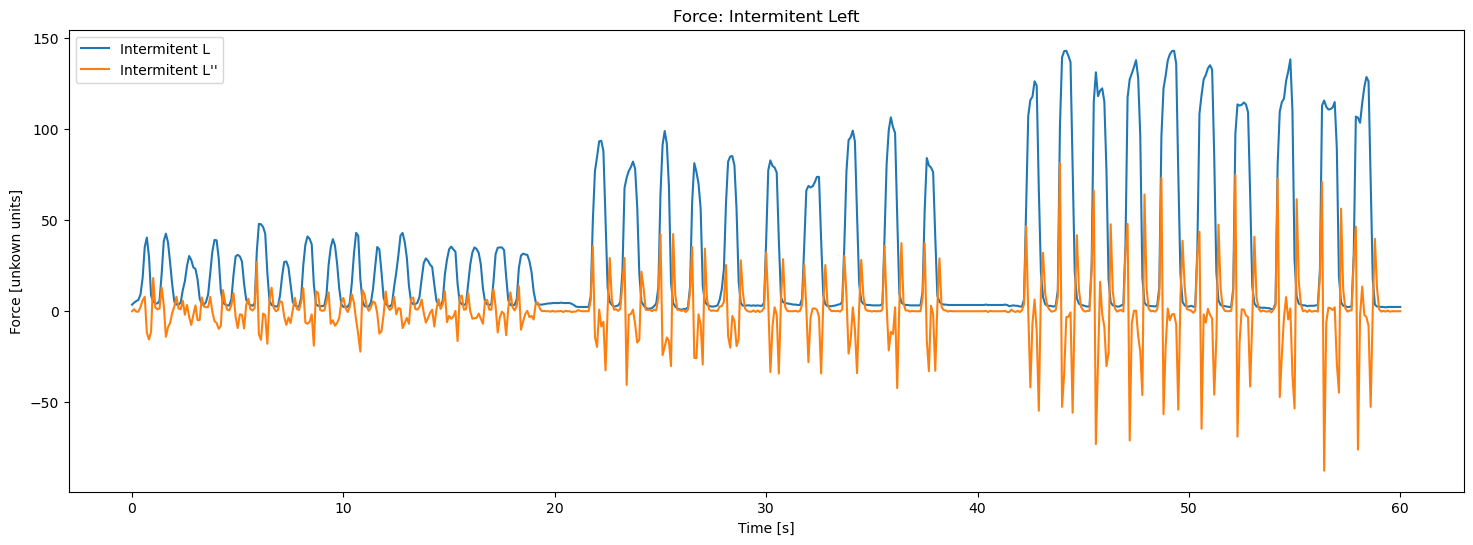

In [34]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l,label="Intermitent L")
#plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_prime,label="Intermitent L'")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_2prime,label="Intermitent L''")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

Notice how we only care about the peaks, so we will compute them in the next section.

## 6.3: Inflection points

In [35]:
def local_max(x,y):
    r=[[],[]]
    for i in range(1,len(y)-1):
        if y[i]>y[i-1]:
            if y[i]>y[i+1]:
                r[0].append(x[i])
                r[1].append(y[i])
    return r

In [36]:
f_intermitent_l_ip=local_max(f_time[:len(f_intermitent_l)],f_intermitent_l_prime)

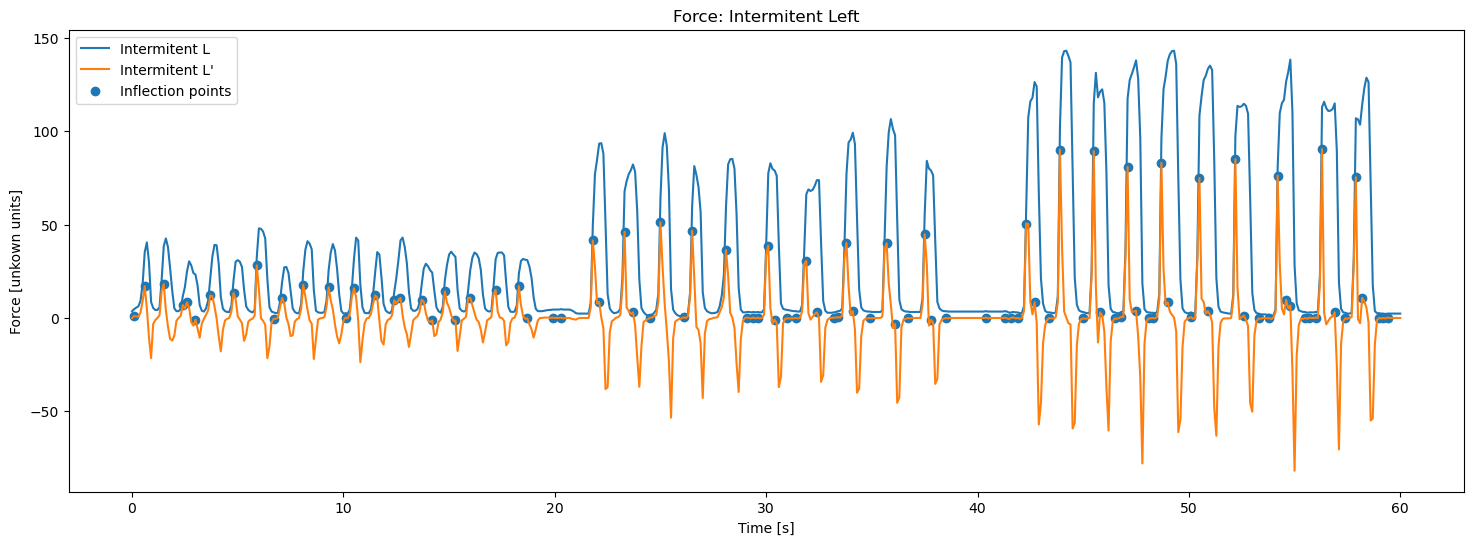

In [37]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_prime,label="Intermitent L'")
#plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_2prime,label="Intermitent L''")
plt.scatter(f_intermitent_l_ip[0],f_intermitent_l_ip[1],label="Inflection points")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Force [unkown units]')
plt.show;

Notice that we have too many inflection points that occur due to noise, so qe will filter out all the points that are above zero. 

In [38]:
def local_max(x,y):
    r=[[],[]]
    for i in range(1,len(y)-1):
        if y[i]>7.5:
            if y[i]>y[i-1]:
                if y[i]>y[i+1]:
                    r[0].append(x[i])
                    r[1].append(y[i])
    return r

In [39]:
f_intermitent_l_ip=local_max(f_time[:len(f_intermitent_l)],f_intermitent_l_prime)

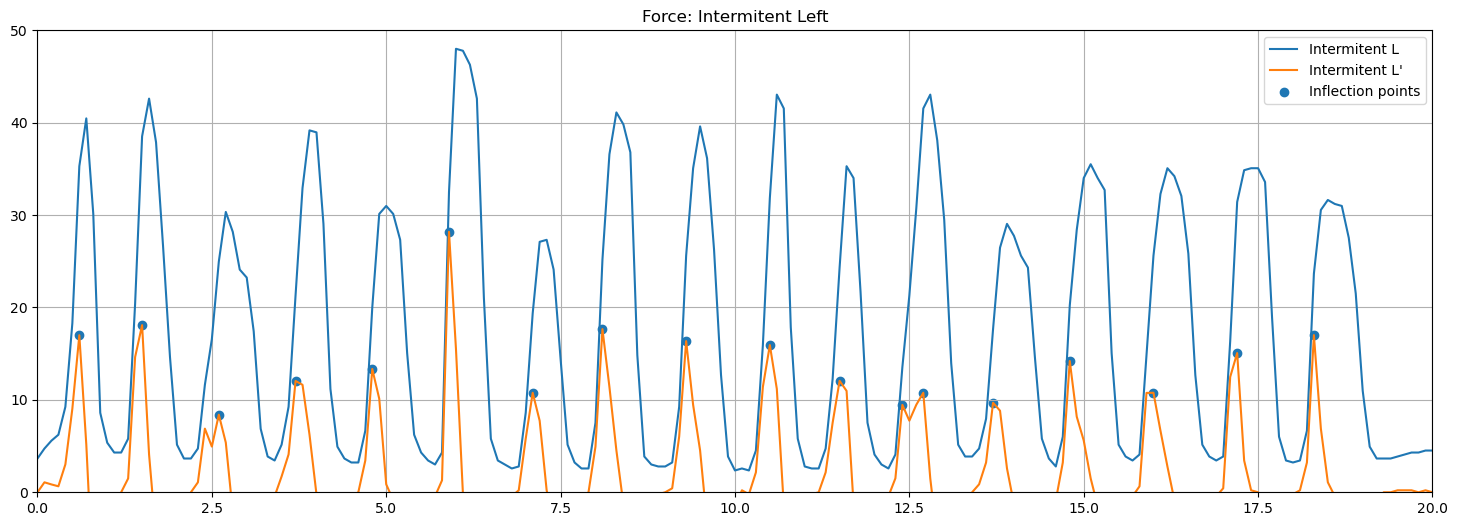

In [40]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_prime,label="Intermitent L'")
#plt.plot(f_time[:len(f_intermitent_l)],f_intermitent_l_2prime,label="Intermitent L''")
plt.scatter(f_intermitent_l_ip[0],f_intermitent_l_ip[1],label="Inflection points")
plt.xlim(0,20)
plt.ylim(0,50)
plt.grid()
plt.legend()
plt.show;

## 6.4: Limits with threshold:

In [41]:
def pa_beginning(x,y,threshold=5):
    r=[[],[],[]]
    for i in range(0,len(y)-1):
        if y[i+1]>threshold:
            if y[i]<threshold:
                r[0].append(x[i])
                r[1].append(y[i])
                r[2].append(i)
    return(r)

In [42]:
f_intermitent_l_pab=pa_beginning(f_time,f_intermitent_l_prime,threshold=4)

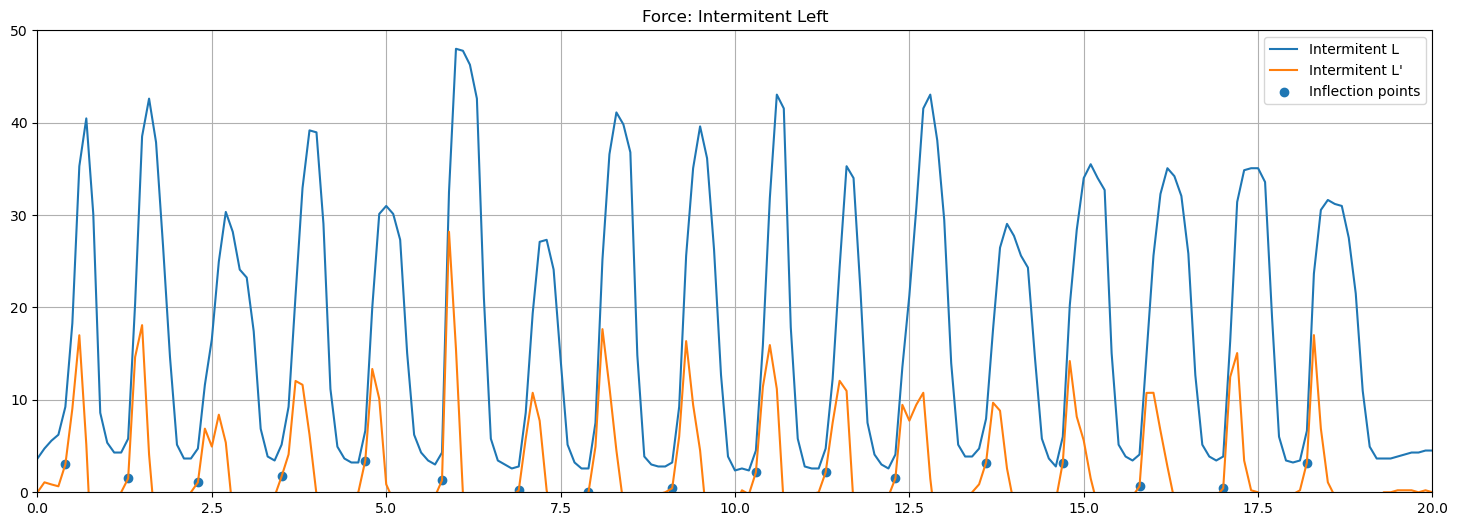

In [43]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:601],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[:601],f_intermitent_l_prime,label="Intermitent L'")
#plt.plot(f_intermitent_l[:,0],f_intermitent_l_2prime,label="Intermitent L''")
plt.scatter(f_intermitent_l_pab[0],f_intermitent_l_pab[1],label="Inflection points")
plt.xlim(0,20)
plt.ylim(0,50)
plt.grid()
plt.legend()
plt.show;

In [44]:
def pa_ending(x,y,threshold=-5):
    r=[[],[],[]]
    for i in range(0,len(y)-1):
        if y[i+1]>threshold:
            if y[i]<threshold:
                r[0].append(x[i+1])
                r[1].append(y[i+1])
                r[2].append(i+1)
    return(r)

In [45]:
f_intermitent_l_pae=pa_ending(f_time,f_intermitent_l_prime,threshold=-6)

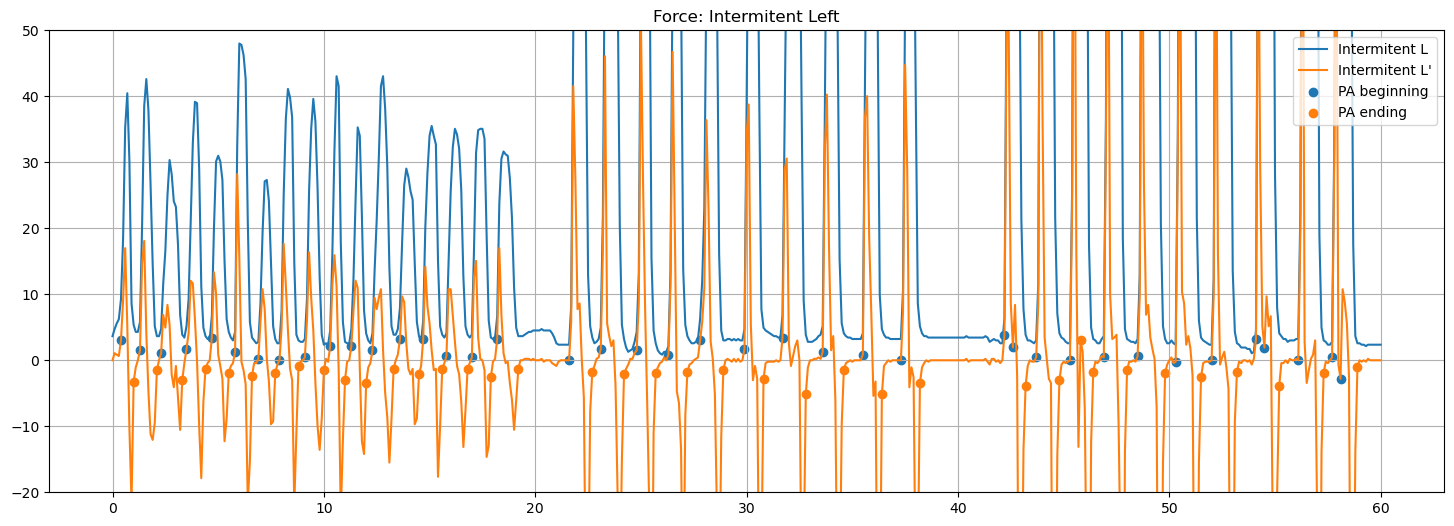

In [46]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[0:601],f_intermitent_l,label="Intermitent L")
plt.plot(f_time[0:601],f_intermitent_l_prime,label="Intermitent L'")
#plt.plot(f_intermitent_l[:,0],f_intermitent_l_2prime,label="Intermitent L''")

plt.scatter(f_intermitent_l_pab[0],f_intermitent_l_pab[1],label="PA beginning")
plt.scatter(f_intermitent_l_pae[0],f_intermitent_l_pae[1],label="PA ending")
#plt.xlim(0,20)
plt.ylim(-20,50)
plt.grid()
plt.legend()
plt.show;

In [47]:
def segments_th(x,y,threshold=6):
    r=[[[],[],[]],[[],[],[]]]
    start=False
    for i in range(1,len(y)):
        if start==False:
            if y[i]>threshold:
                if y[i-1]<threshold:
                    r[0][0].append(x[i])
                    r[0][1].append(y[i])
                    r[0][2].append(i)
                    start=True
        if start==True:
            if y[i]<threshold:
                if y[i-1]>threshold:
                    r[1][0].append(x[i-1])
                    r[1][1].append(y[i-1])
                    r[1][2].append(i-1)
                    start=False
    return(r)

In [48]:
segments_l=segments_th(f_time[:601],f_intermitent_l)
segments_r=segments_th(f_time[:len(f_intermitent_r)],f_intermitent_r)

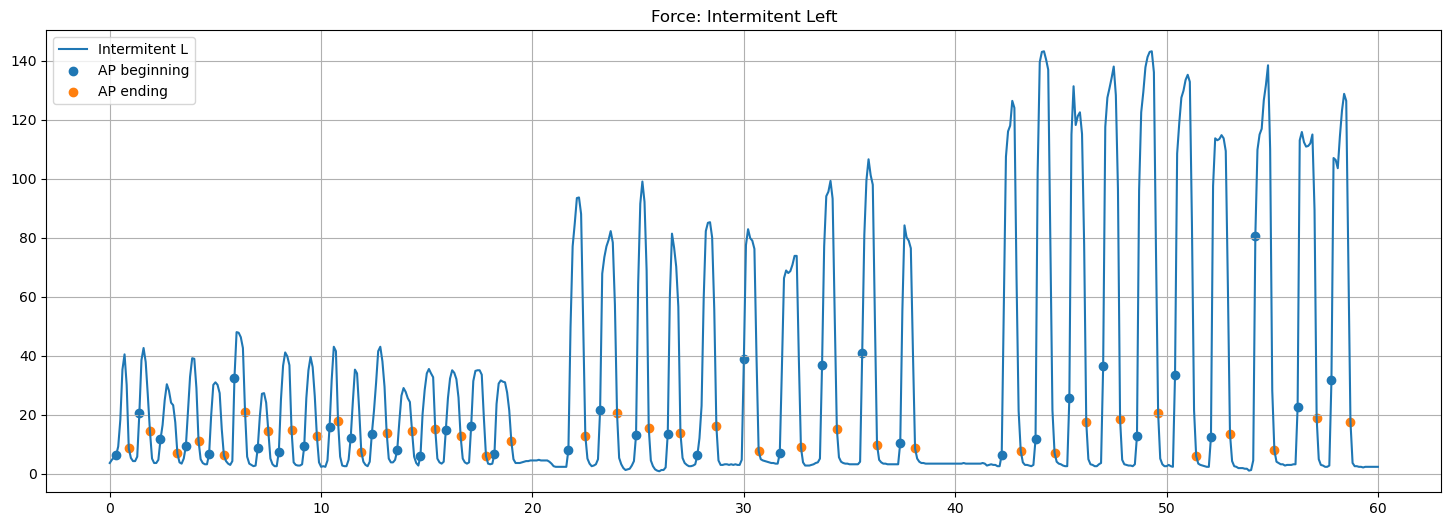

In [49]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Left")
plt.plot(f_time[:601],f_intermitent_l,label="Intermitent L")
plt.scatter(segments_l[0][0],segments_l[0][1],label="AP beginning")
plt.scatter(segments_l[1][0],segments_l[1][1],label="AP ending")
#plt.xlim(0,20)
plt.grid()
plt.legend()
plt.show;

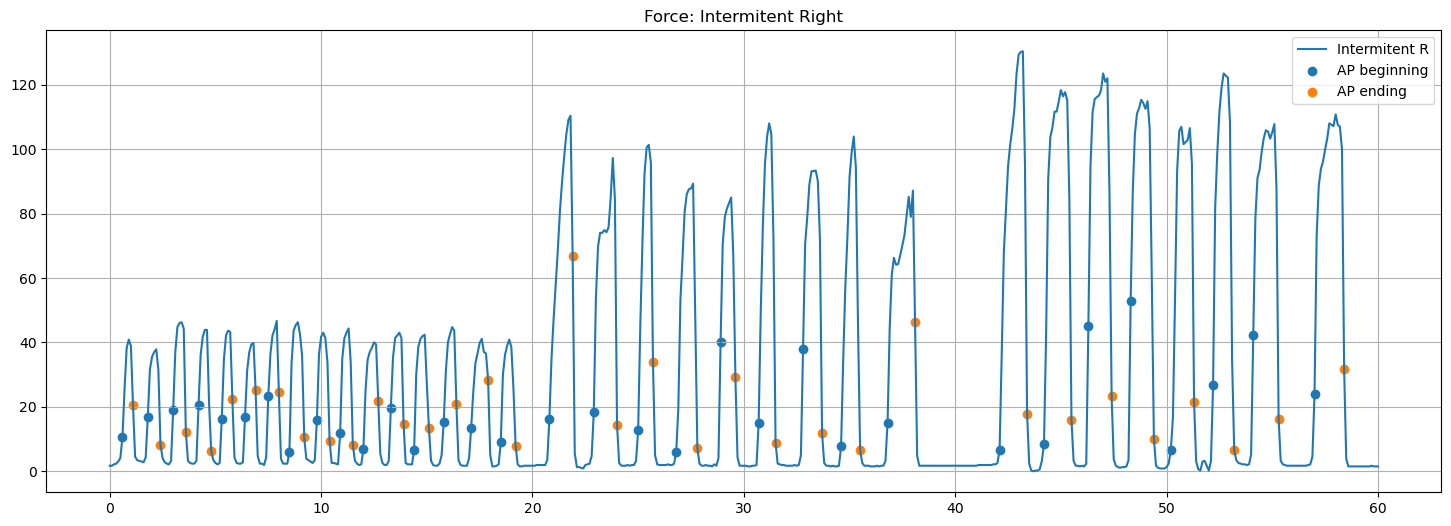

In [50]:
plt.figure(figsize=(18,6))
plt.title("Force: Intermitent Right")
plt.plot(f_time[:len(f_intermitent_r)],f_intermitent_r,label="Intermitent R")
plt.scatter(segments_r[0][0],segments_r[0][1],label="AP beginning")
plt.scatter(segments_r[1][0],segments_r[1][1],label="AP ending")
#plt.xlim(0,20)
plt.grid()
plt.legend()
plt.show;

## 7.- Segmenting the EMG

In [51]:
def find_in(array,x):
    for i in range(1,len(array)):
        if array[i]>=x:
            if array[i-1]<x:
                return(i)
    print("Error: Valor no encontrado")
    return("Error")

In [52]:
Time_a=np.linspace(-1.45,offset_i_l-a_i_l+f_time[len(f_intermitent_l-1)],num=len(intermitent_l))
Time_b=np.linspace(-0.9,offset_i_r-a_i_r+f_time[len(f_intermitent_r-1)],num=len(intermitent_r))

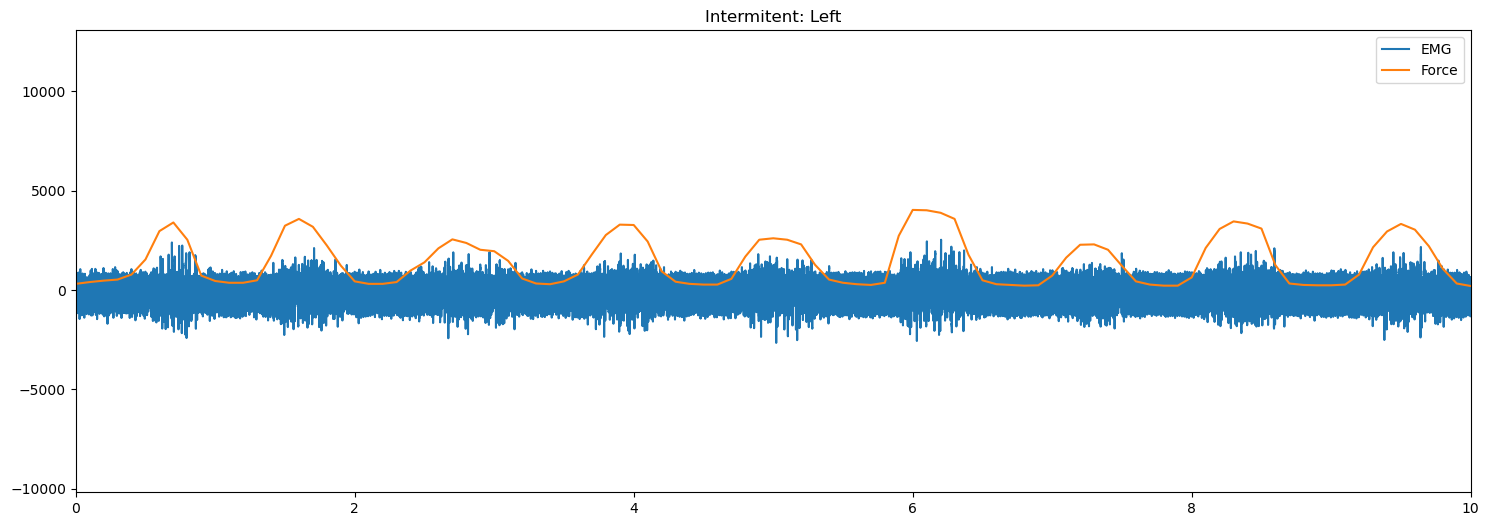

In [53]:
plt.figure(figsize=(18,6))
plt.title("Intermitent: Left")
plt.plot(Time_a,intermitent_l,label="EMG")
plt.plot(f_time[:601],max(intermitent_l)*f_intermitent_l/max(f_intermitent_l),label="Force")
#plt.scatter(segments[0][0],100*segments[0][1],label="PA beginning")
#plt.scatter(segments[1][0],100*segments[1][1],label="PA ending")
plt.xlim(0,10)
#plt.ylim(-5000,5000)
plt.legend()
plt.show;

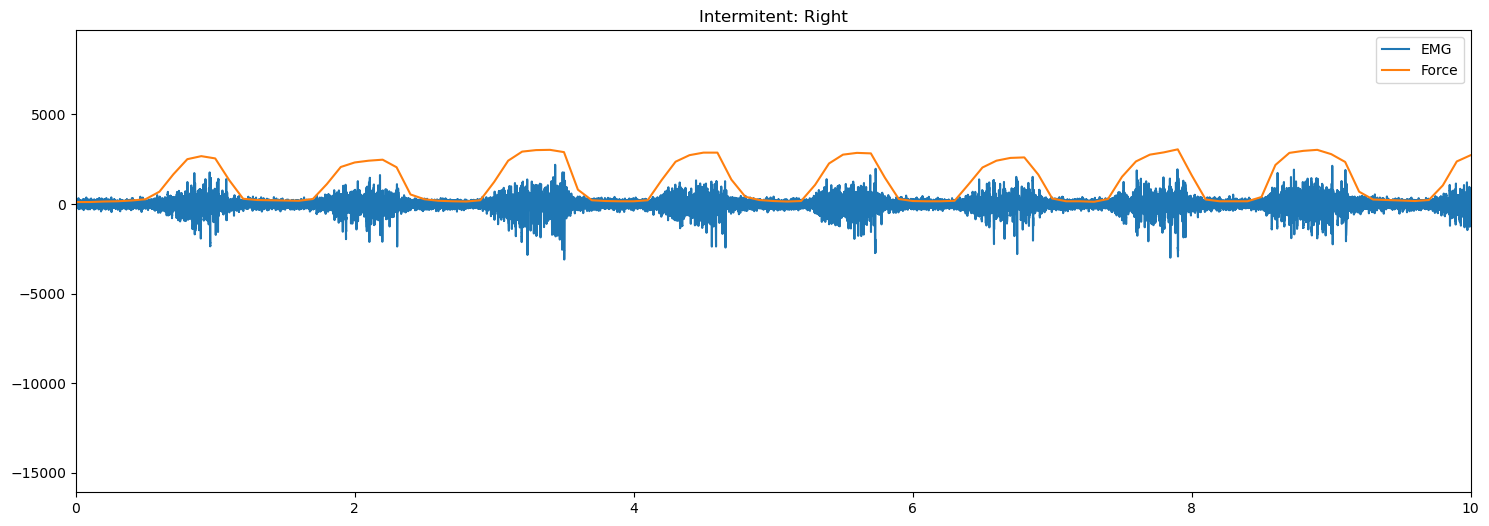

In [54]:
plt.figure(figsize=(18,6))
plt.title("Intermitent: Right")
plt.plot(Time_b,intermitent_r,label="EMG")
plt.plot(f_time[:len(f_intermitent_r)],max(intermitent_r)*f_intermitent_r/max(f_intermitent_r),label="Force")
#plt.scatter(segments[0][0],100*segments[0][1],label="PA beginning")
#plt.scatter(segments[1][0],100*segments[1][1],label="PA ending")
plt.xlim(0,10)
#plt.ylim(-5000,5000)
plt.legend()
plt.show;

## 8.- Muscle fiber recruitment: Frecuency analysis

### 8.1) Main frequency comparison
The first value we are going to look into is the main frequency of each segment. This might give us a clue of the amount of muscle fibers that are getting activated. We expect to find higher frequencies when the force is greater. 

In [55]:
#First we define a function that calculates the fft of a given segment 
# and returns the frequency at which a maxima is obtained
def mainFreq(i,side="l"):
    if side=="l":
        Pa=intermitent_l[find_in(Time_a,segments_l[0][0][i]):find_in(Time_a,segments_l[1][0][i])]
        #plt.figure(figsize=(18,6))
        #plt.subplot(121)
        #plt.plot(Time_a[find_in(Time_a,segments_l[0][0][i]):find_in(Time_a,segments_l[1][0][i])],Pa)
        #plt.xlabel("Time(s)")
        #plt.ylabel("EMG Amplitude (uV)")
        #plt.title("EMG")
    else:
        Pa=intermitent_r[find_in(Time_b,segments_r[0][0][i]):find_in(Time_b,segments_r[1][0][i])]
        #plt.figure(figsize=(18,6))
        #plt.subplot(121)
        #plt.plot(Time_b[find_in(Time_b,segments_r[0][0][i]):find_in(Time_b,segments_r[1][0][i])],Pa)
        #plt.xlabel("Time(s)")
        #plt.ylabel("EMG Amplitude (uV)")
        #plt.title("EMG")
    
    #The fft is calculated
    X = fft(Pa)
    N = len(X)
    n = np.arange(N)
    freq = n/(Time_a[-1]-Time_a[0])

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside

    main_freq=freq[np.argmax(X_oneside)]

    #plt.subplot(122)
    #plt.stem(f_oneside, abs(X_oneside), linefmt='b',markerfmt=" ", basefmt="-b")
    #plt.xlabel('Freq (Hz)')
    #plt.ylabel('Normalized FFT Amplitude |X(freq)|')
    #plt.tight_layout()
    #plt.xlim(0,100)
    #plt.show()
    return(main_freq)

In [56]:
np.shape(segments_r)

(2, 3, 33)

In [57]:
freq_req_l=[]
for i in range(0,37):
    freq_req_l.append(mainFreq(i))

In [58]:
freq_req_r=[]
for i in range(0,33):
    freq_req_r.append(mainFreq(i,side="r"))

Each segment is classified by the intensity of the force produced. Each of the 4 measurments consisted in 3 sets of pulses (S1, S2 and S3). The force produced was meant to be similar in every pulse of a given set. The first set (s1) corresponds to the lowest force pulses, while the third and last set (S3) corresponds to the higher force pulses.

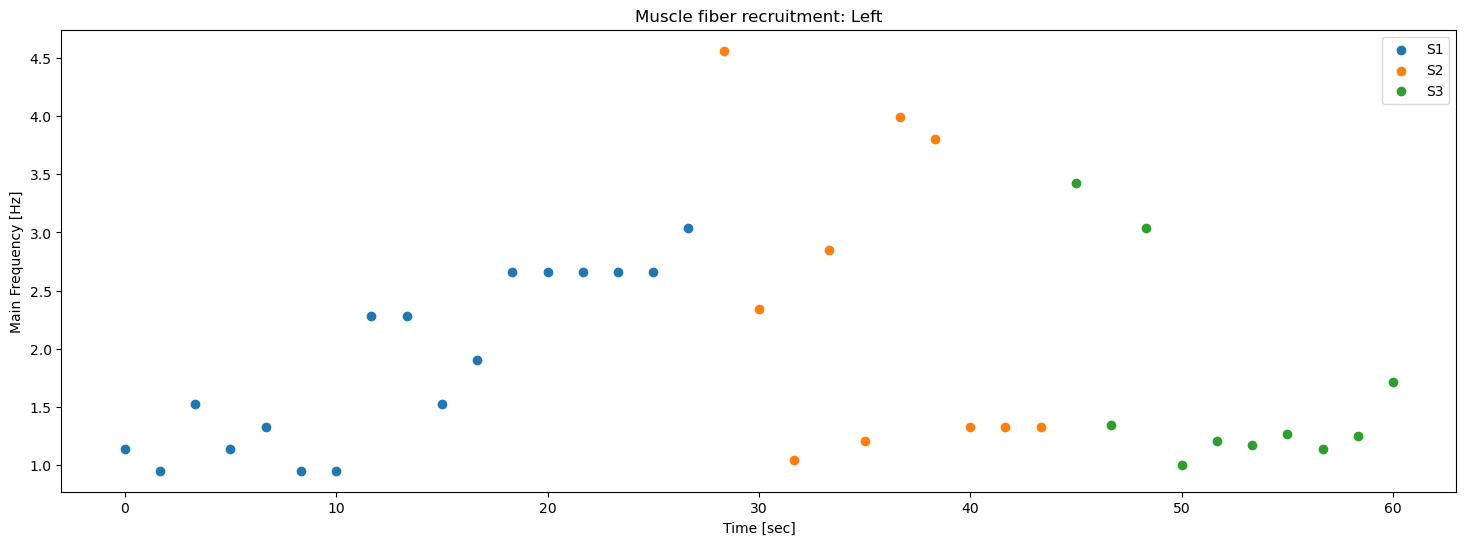

In [59]:
plt.figure(figsize=(18,6))
plt.scatter(np.linspace(0,60,num=37)[:17],freq_req_l[:17],label="S1")
plt.scatter(np.linspace(0,60,num=37)[17:27],freq_req_l[17:27],label="S2")
plt.scatter(np.linspace(0,60,num=37)[27:],freq_req_l[27:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: Left')
plt.ylabel('Main Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show;

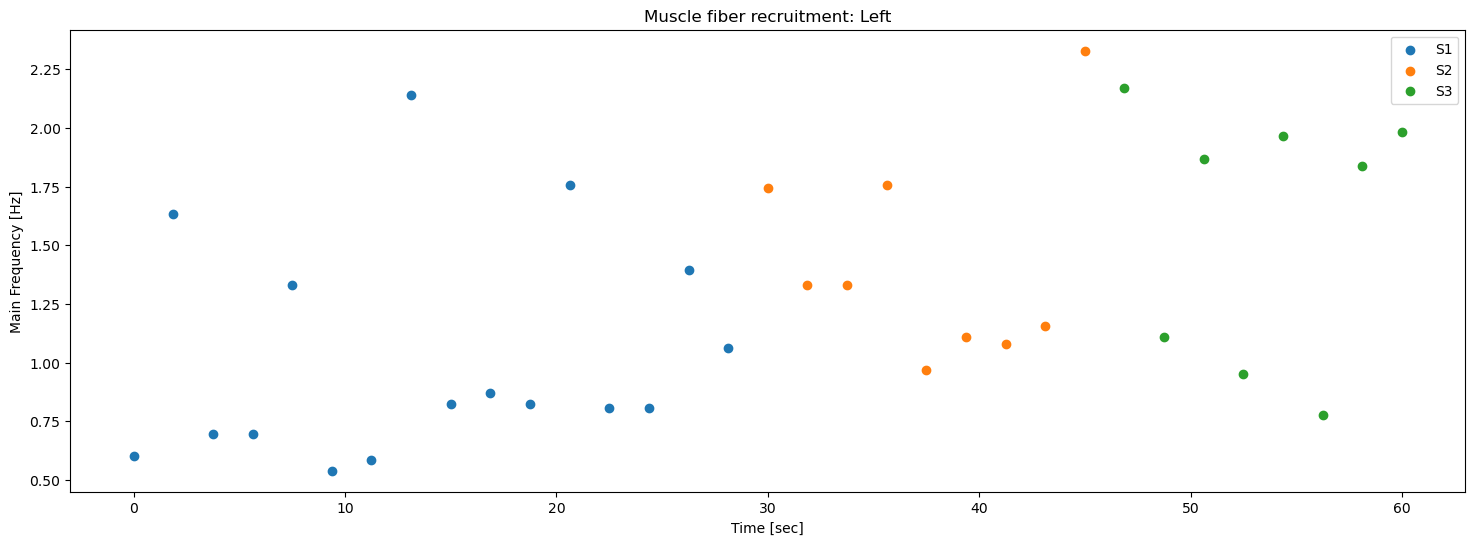

In [60]:
plt.figure(figsize=(18,6))
plt.scatter(np.linspace(0,60,num=33)[:16],freq_req_r[:16],label="S1")
plt.scatter(np.linspace(0,60,num=33)[16:25],freq_req_r[16:25],label="S2")
plt.scatter(np.linspace(0,60,num=33)[25:],freq_req_r[25:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: Left')
plt.ylabel('Main Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show;

From the graphs above we can concude that the most relevant frequency isn't a significative number. No correlation can be found between the force produced and the frequency of the EMG based on this analysis. This might be due to two reasons. Either the measurments don't have enough resolution to properly indentify the muscle fiber recruitment or the shape of the spectrogram can't be accurately described by the main frecuency component. In the first case we would need to repeat the whole experiment once again and get new measurments with a more precise detector. If the second case is true, we should find a new way to clasify the shape of the spectrogram. 

### 8.2) Spectrogram

In [61]:
f_r,t_r,sxx_r = sc.signal.spectrogram(intermitent_r,sr_intermitent_r,nperseg=sr_intermitent_r//2, scaling='spectrum')

In [62]:
f_l,t_l,sxx_l = sc.signal.spectrogram(intermitent_l,sr_intermitent_l,nperseg=sr_intermitent_l//2, scaling='spectrum')

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/4177834764.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


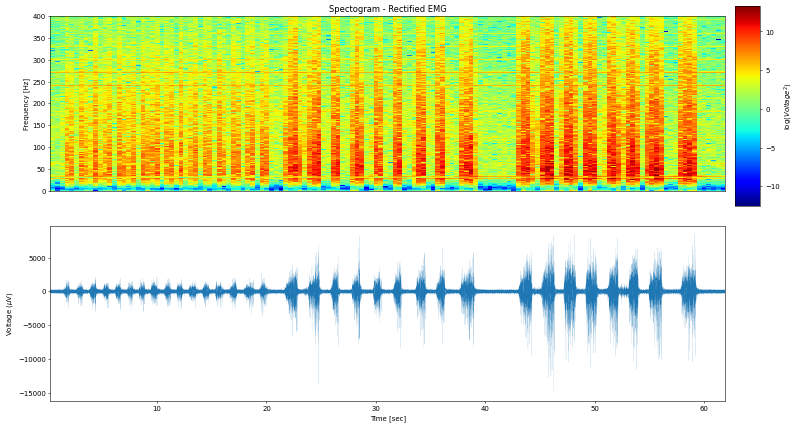

In [63]:
f_r = f_r[:401]
sxx_r = sxx_r[:401]

fig = plt.figure(figsize=(20,10),dpi=50)
ax1 = plt.subplot(211)
plt.pcolormesh(np.log(sxx_r),cmap='jet')
plt.xticks([])
plt.ylabel('Frequency [Hz]')
plt.title('Spectogram - Rectified EMG')

ax2 = plt.subplot(212)
plt.plot(np.arange(0,len(intermitent_r))/sr_intermitent_r,intermitent_r,lw=.1)
plt.ylabel('Voltage ($\mu$V)')
plt.xlabel('Time [sec]')
plt.xlim(t_r[0],t_r[-1])

# adding an independent axis for the colorbar:
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.81, .5, 0.025, 0.4])
plt.colorbar(label='log($Voltage^2$)',cax=cbar_ax,)

plt.draw()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/3415151233.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


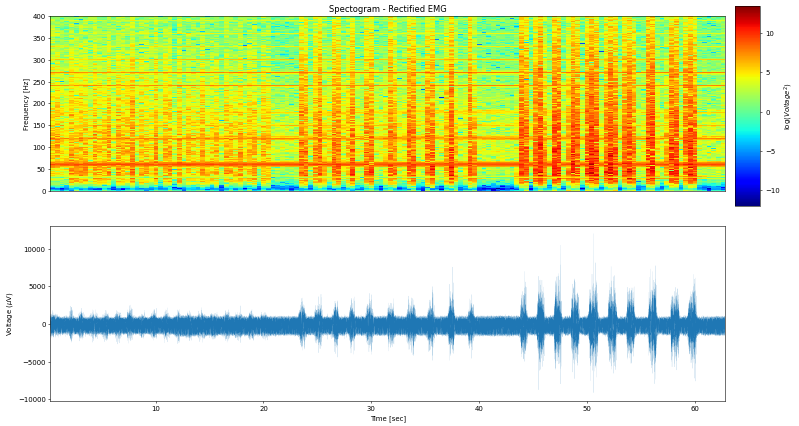

In [64]:
f_l = f_l[:401]
sxx_l = sxx_l[:401]

fig = plt.figure(figsize=(20,10),dpi=50)
ax1 = plt.subplot(211)
plt.pcolormesh(np.log(sxx_l),cmap='jet')
plt.xticks([])
plt.ylabel('Frequency [Hz]')
plt.title('Spectogram - Rectified EMG')

ax2 = plt.subplot(212)
plt.plot(np.arange(0,len(intermitent_l))/sr_intermitent_l,intermitent_l,lw=.1)
plt.ylabel('Voltage ($\mu$V)')
plt.xlabel('Time [sec]')
plt.xlim(t_l[0],t_l[-1])

# adding an independent axis for the colorbar:
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.81, .5, 0.025, 0.4])
plt.colorbar(label='log($Voltage^2$)',cax=cbar_ax,)

plt.draw()

From the spectrogram we can see that the main frequency isn't as important as the distribution of the spectrogram. In pulses of greater force, the spectogram of the signal apears to be wider (more high frequency components). From this observations we see that the signal could be described by the mean root squared of the values in the corresponding segment. 

### 8.3) Average frequency in spectrogram of each segment

In [65]:
def rms_freq(i,side="l"):
    if side=="l":
        Pa=intermitent_l[find_in(Time_a,segments_l[0][0][i]):find_in(Time_a,segments_l[1][0][i])]
    else:
        Pa=intermitent_r[find_in(Time_b,segments_r[0][0][i]):find_in(Time_b,segments_r[1][0][i])]
    
    #The fft is calculated
    X = fft(Pa)
    N = len(X)
    n = np.arange(N)
    freq = n/(Time_a[-1]-Time_a[0])

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside
    
    #First we compute the area under the curve of the spectrogram in log scale
    area=0.
    for i in range(0,n_oneside):
        area+=np.log(abs(X_oneside[i]))
    
    #Now we must find the value i at which the area under the curve is the half of the total area
    area2=0.
    for i in range(0,n_oneside):
        if area2>(area/2):
            area2+=np.log(abs(X_oneside[i]))
        else:
            return freq[i]

In [66]:
freq_rms_l=[]
for i in range(0,37):
    freq_rms_l.append(rms_freq(i))

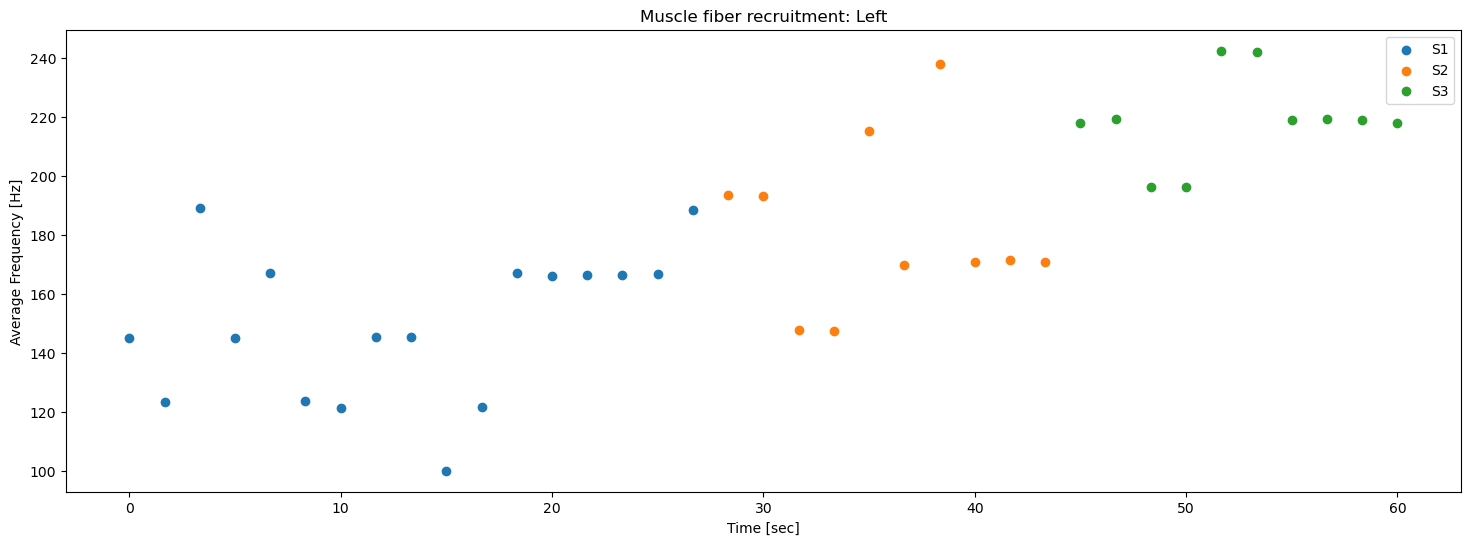

In [67]:
plt.figure(figsize=(18,6))
plt.scatter(np.linspace(0,60,num=37)[:17],freq_rms_l[:17],label="S1")
plt.scatter(np.linspace(0,60,num=37)[17:27],freq_rms_l[17:27],label="S2")
plt.scatter(np.linspace(0,60,num=37)[27:],freq_rms_l[27:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: Left')
plt.ylabel('Average Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show;

In [68]:
freq_rms_r=[]
for i in range(0,33):
    freq_rms_r.append(rms_freq(i,side="r"))

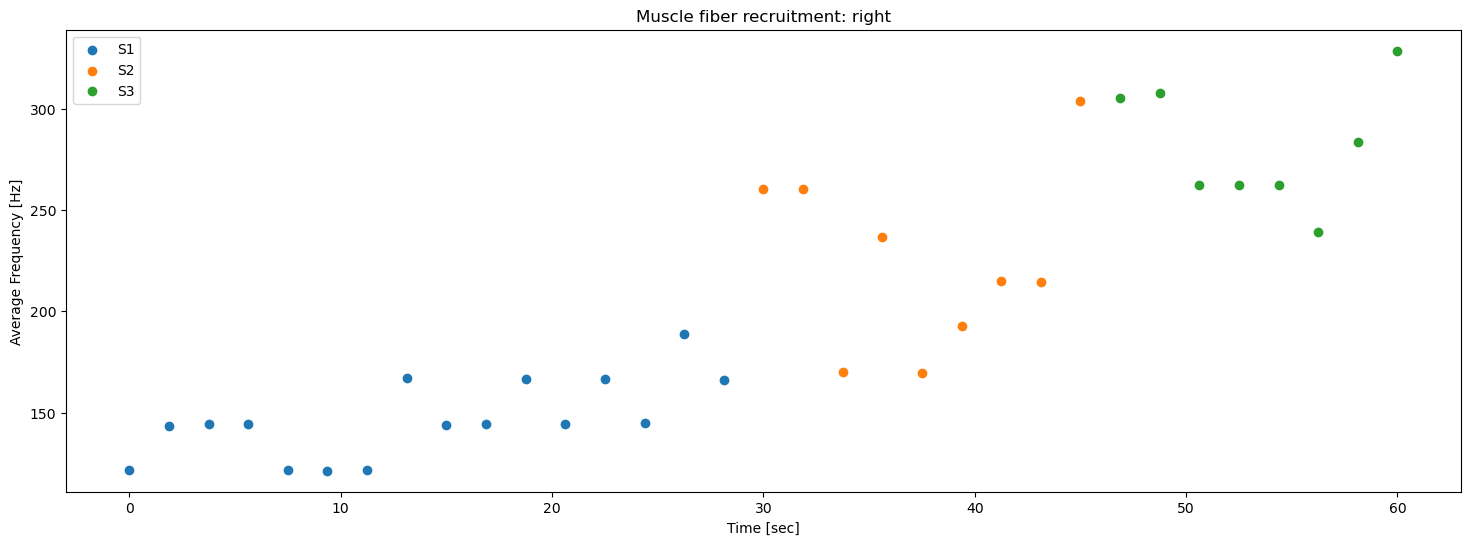

In [69]:
plt.figure(figsize=(18,6))
plt.scatter(np.linspace(0,60,num=33)[:16],freq_rms_r[:16],label="S1")
plt.scatter(np.linspace(0,60,num=33)[16:25],freq_rms_r[16:25],label="S2")
plt.scatter(np.linspace(0,60,num=33)[25:],freq_rms_r[25:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: right')
plt.ylabel('Average Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show;

## 9.- Average frequency vs force produced

In [70]:
# For every segment of the force array, we append the maximum value to the array f_intermitent_l_max
f_intermitent_l_max=[]
for i in range(0,len(segments_l[0][0])):
    f_intermitent_l_max.append(max(f_intermitent_l[segments_l[0][2][i]:segments_l[1][2][i]]))

In [71]:
len(f_intermitent_l_max)

37

In [72]:
# For every segment of the force array, we append the maximum value to the array f_intermitent_r_max
f_intermitent_r_max=[]
for i in range(0,len(segments_r[0][0])):
    f_intermitent_r_max.append(max(f_intermitent_r[segments_r[0][2][i]:segments_r[1][2][i]]))

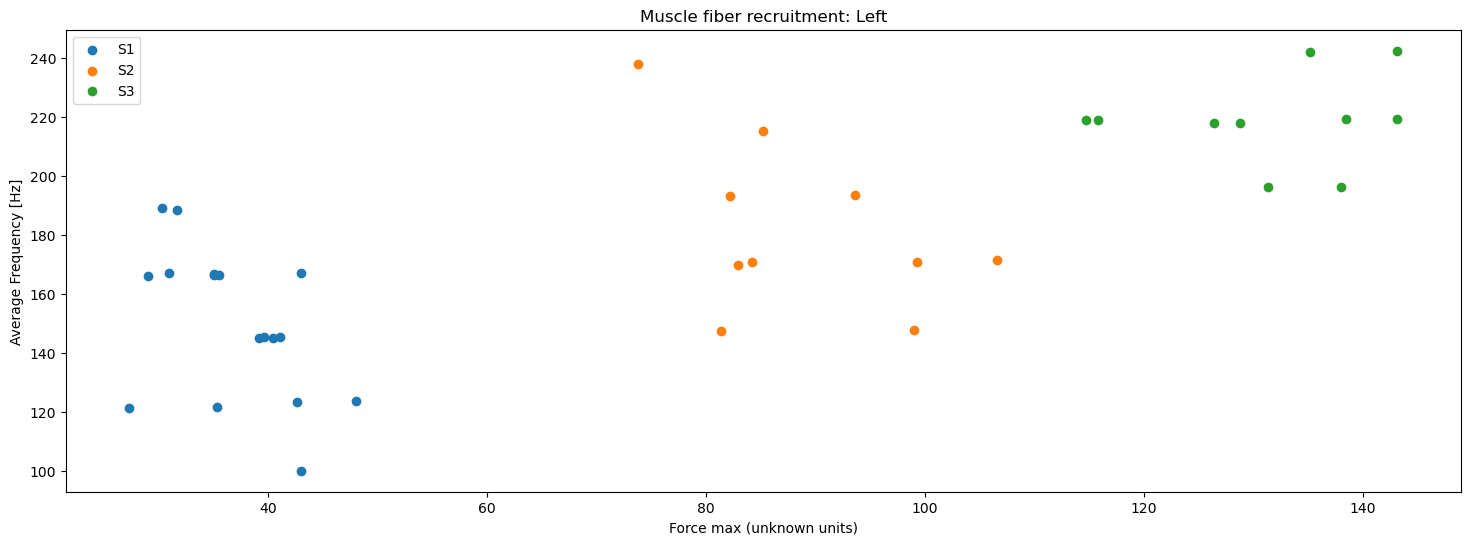

In [73]:
plt.figure(figsize=(18,6))
plt.scatter(f_intermitent_l_max[:17],freq_rms_l[:17],label="S1")
plt.scatter(f_intermitent_l_max[17:27],freq_rms_l[17:27],label="S2")
plt.scatter(f_intermitent_l_max[27:],freq_rms_l[27:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: Left')
plt.ylabel('Average Frequency [Hz]')
plt.xlabel("Force max (unknown units)")
plt.show;

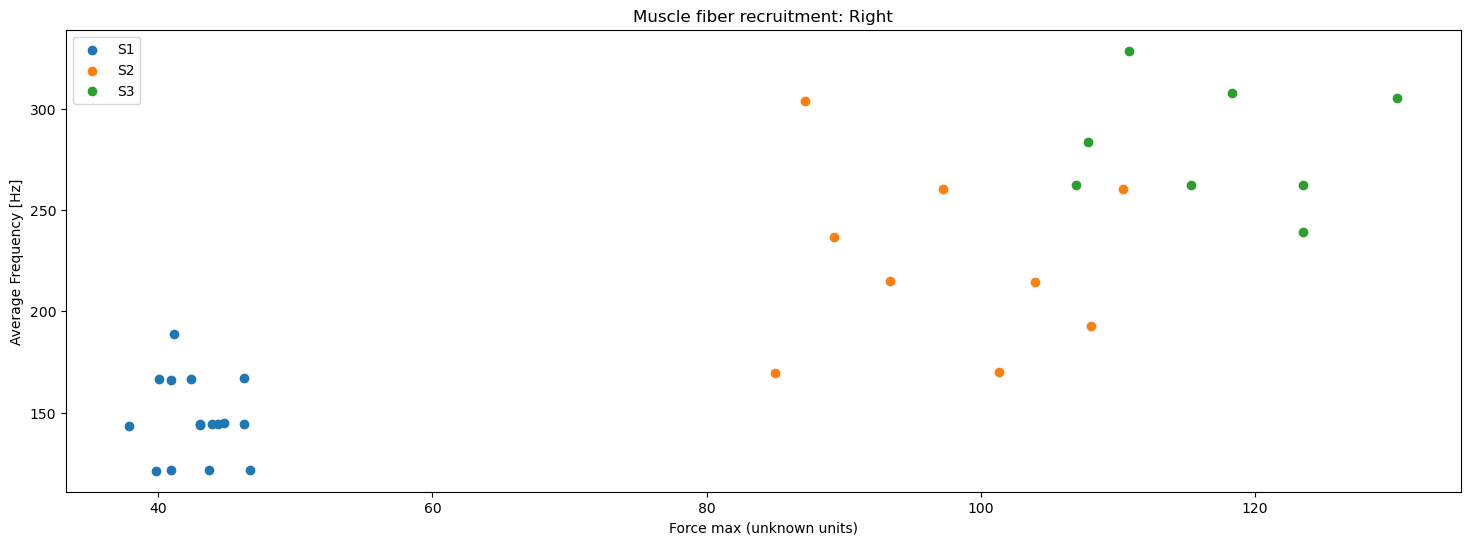

In [74]:
plt.figure(figsize=(18,6))
plt.scatter(f_intermitent_r_max[:16],freq_rms_r[:16],label="S1")
plt.scatter(f_intermitent_r_max[16:25],freq_rms_r[16:25],label="S2")
plt.scatter(f_intermitent_r_max[25:],freq_rms_r[25:],label="S3")
plt.legend()
plt.title('Muscle fiber recruitment: Right')
plt.ylabel('Average Frequency [Hz]')
plt.xlabel("Force max (unknown units)")
plt.show;

## 10.- Rectification and envelope

### 10.1) Envelope method 1: Low-pass filter

In [75]:
intermitent_r_abs=abs(intermitent_r)
intermitent_l_abs=abs(intermitent_l)

In [76]:
def envelope(x,sr,lf=15):
    X=fft(x)

    # calculate the frequency
    N = len(X)
    T = N/sr
    
    # Filter out the 60 Hz noise
    for i in range(int(lf*T),len(X)-int(lf*T)):
        X[i]=0
    X2=ifft(X).real
    return X2

In [77]:
intermitent_l_env=envelope(intermitent_l_abs,sr_intermitent_l)
intermitent_r_env=envelope(intermitent_r_abs,sr_intermitent_r)

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/3162514347.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


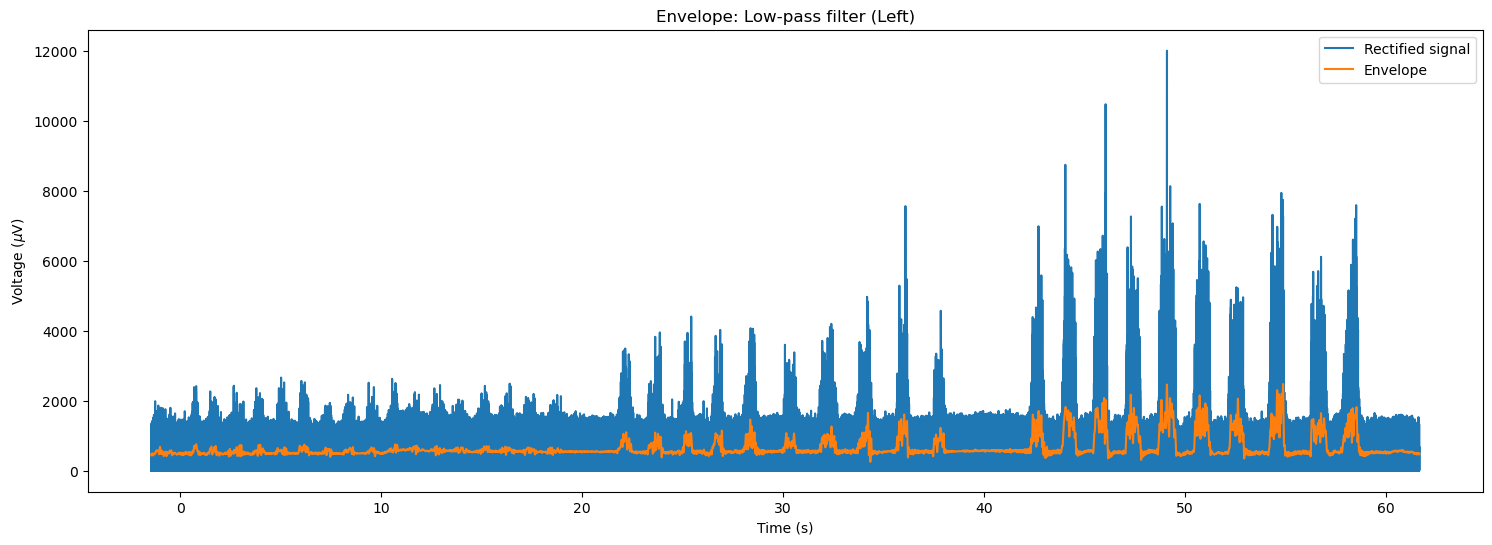

In [78]:
plt.figure(figsize=(18,6))
plt.plot(Time_a,intermitent_l_abs,label="Rectified signal")
#plt.plot(Time_a,intermitent_l,label="EMG")
plt.plot(Time_a,intermitent_l_env,label="Envelope")
plt.legend()
plt.title("Envelope: Low-pass filter (Left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/1855869911.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


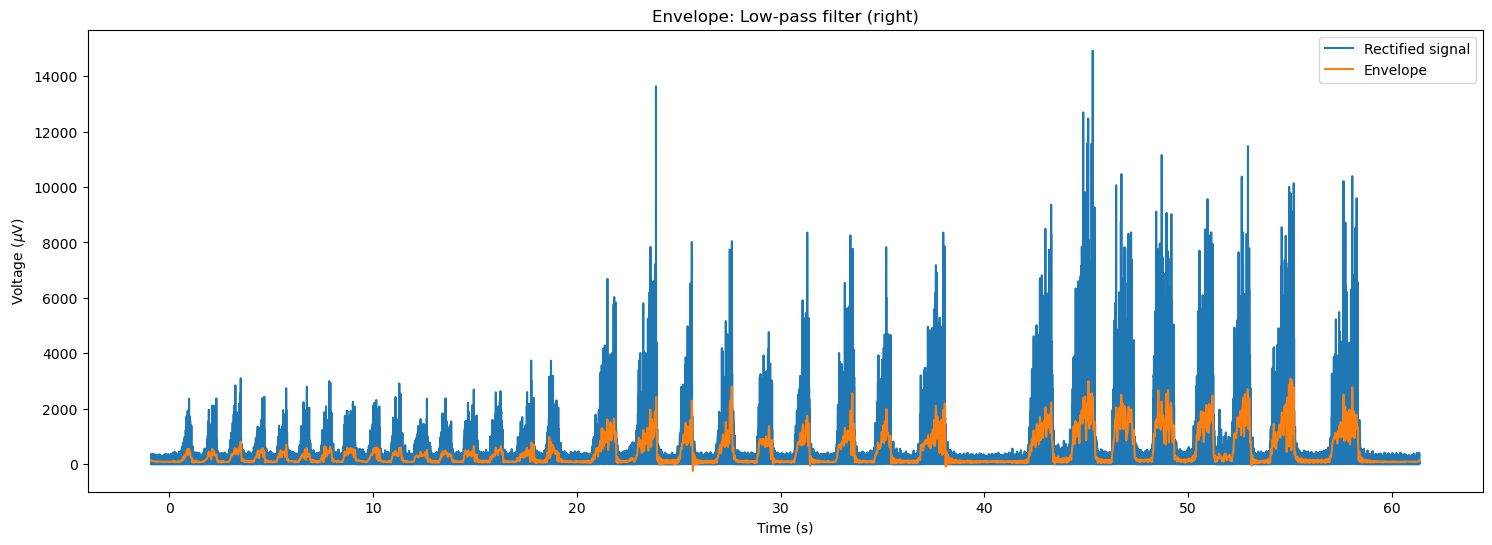

In [79]:
plt.figure(figsize=(18,6))
plt.plot(Time_b,intermitent_r_abs,label="Rectified signal")
#plt.plot(Time_b,intermitent_r,label="EMG")
plt.plot(Time_b,intermitent_r_env,label="Envelope")
plt.legend()
plt.title("Envelope: Low-pass filter (right)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

### 10.2) Envelope method 2: Local max in a time window

In [80]:
def envelope_2(x,y,s=6000):
    # x: Time array
    # y: Voltage array
    # s: Time window (# of values in a single time window)
    x2=[]
    y2=[]
    for i in range(0,-1+len(x)//s):
        x2.append(max(x[s*i:s*(i+1)]))
        y2.append(y[s*i])
    return(x2,y2)

In [81]:
#The envelope is calculated for each hand
intermitent_l_env2,time_l_env=envelope_2(intermitent_l_abs,Time_a)
intermitent_r_env2,time_r_env=envelope_2(intermitent_r_abs,Time_b)

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/1545707681.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


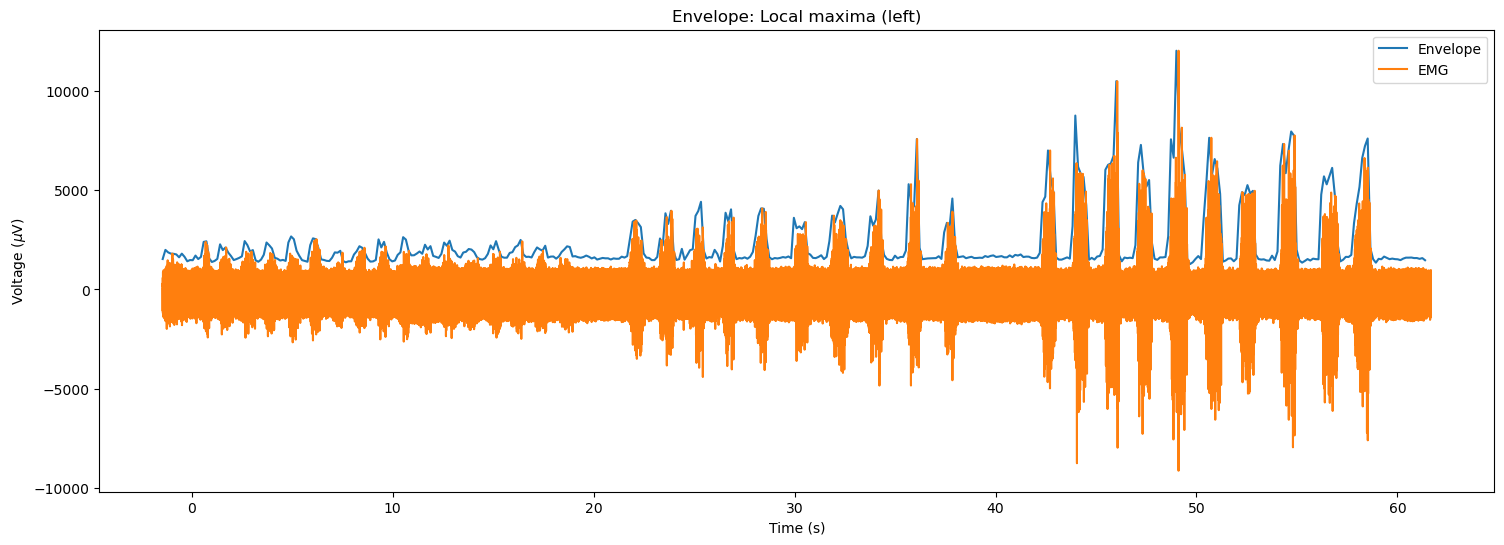

In [82]:
#Plot left hand envelope and EMG
plt.figure(figsize=(18,6))
plt.plot(time_l_env,intermitent_l_env2,label="Envelope")
#plt.plot(Time_a,intermitent_l_abs,label="Rectified signal")
plt.plot(Time_a,intermitent_l,label="EMG")
plt.legend()
#plt.xlim(0,10)
plt.title("Envelope: Local maxima (left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/228831361.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


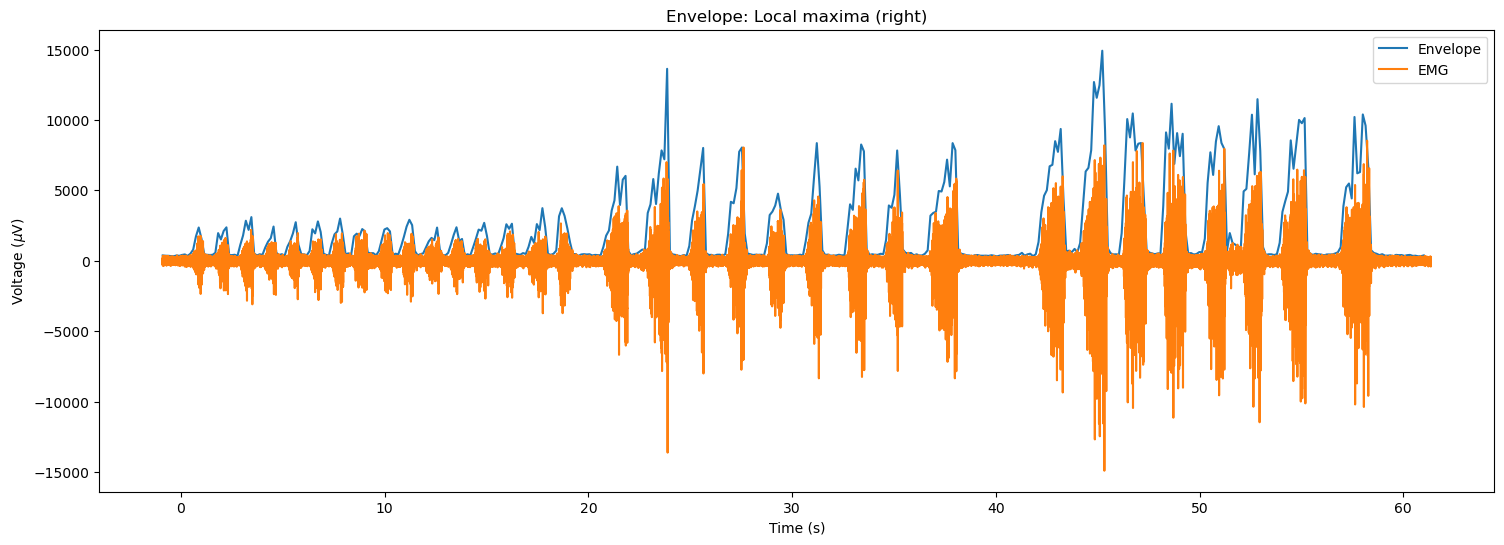

In [83]:
#Plot right hand envelope and EMG
plt.figure(figsize=(18,6))
plt.plot(time_r_env,intermitent_r_env2,label="Envelope")
#plt.plot(Time_b,intermitent_r_abs,label="Rectified signal")
plt.plot(Time_b,intermitent_r,label="EMG")
plt.legend()
plt.title("Envelope: Local maxima (right)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

### 10.3) Envelope method 3: Root mean squared in a time window

The root mean squared method consists a squared root of the mean squared values in a moving time window:

$ \sqrt{\frac{\sum_{i=a}^{b} x_i^2}{(b-a)}}$

In the example above the time window starts in x_a and it ends in x_b. The time window contains b-a values.

In [84]:
def envelope_rms(x,s=3000):
    x2 = np.power(x,2)
    window = np.ones(s)/float(s)
    return np.sqrt(np.convolve(x2, window, 'same'))

Breaking it down, the np.power(a, 2) part makes a new array with the same dimension as a, but where each value is squared. np.ones(window_size)/float(window_size) produces an array or length window_size where each element is 1/window_size.

In [85]:
intermitent_l_rms=envelope_rms(intermitent_l_abs)
intermitent_r_rms=envelope_rms(intermitent_r_abs)

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/944359641.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


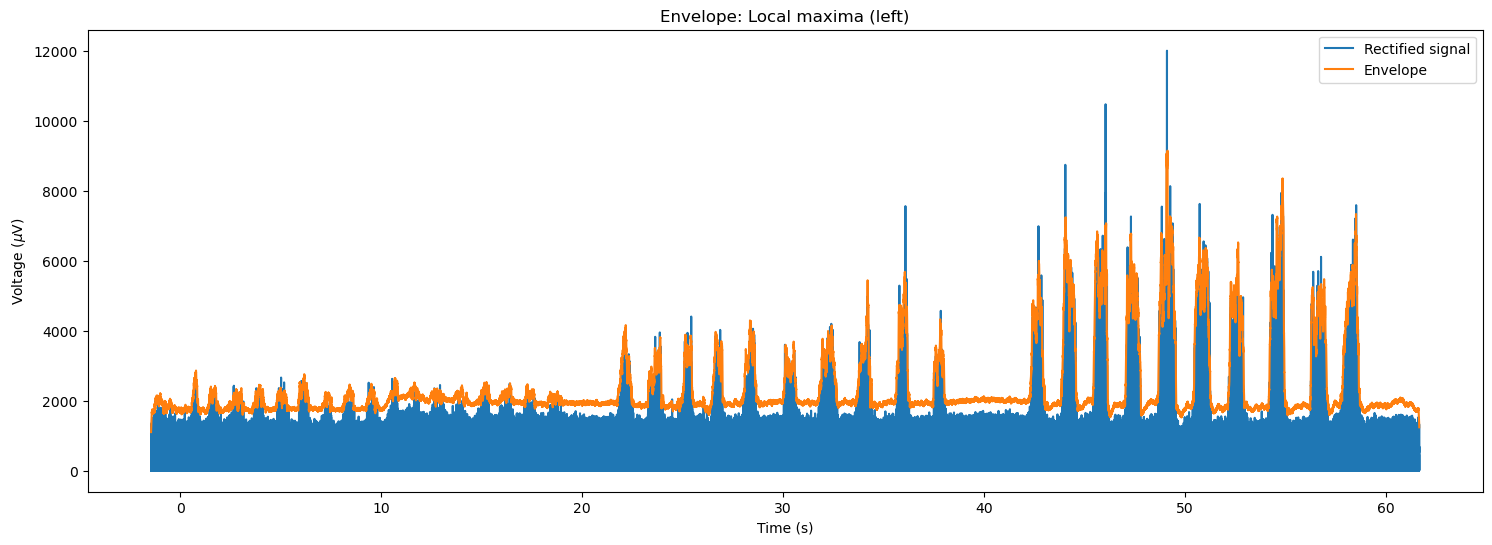

In [86]:
#Plot left hand envelope and EMG
plt.figure(figsize=(18,6))
#plt.plot(Time_a,intermitent_l,label="EMG")
plt.plot(Time_a,intermitent_l_abs,label="Rectified signal")
plt.plot(Time_a,3*intermitent_l_rms,label="Envelope")
plt.legend()
#plt.xlim(0,10)
plt.title("Envelope: Local maxima (left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/245550948.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


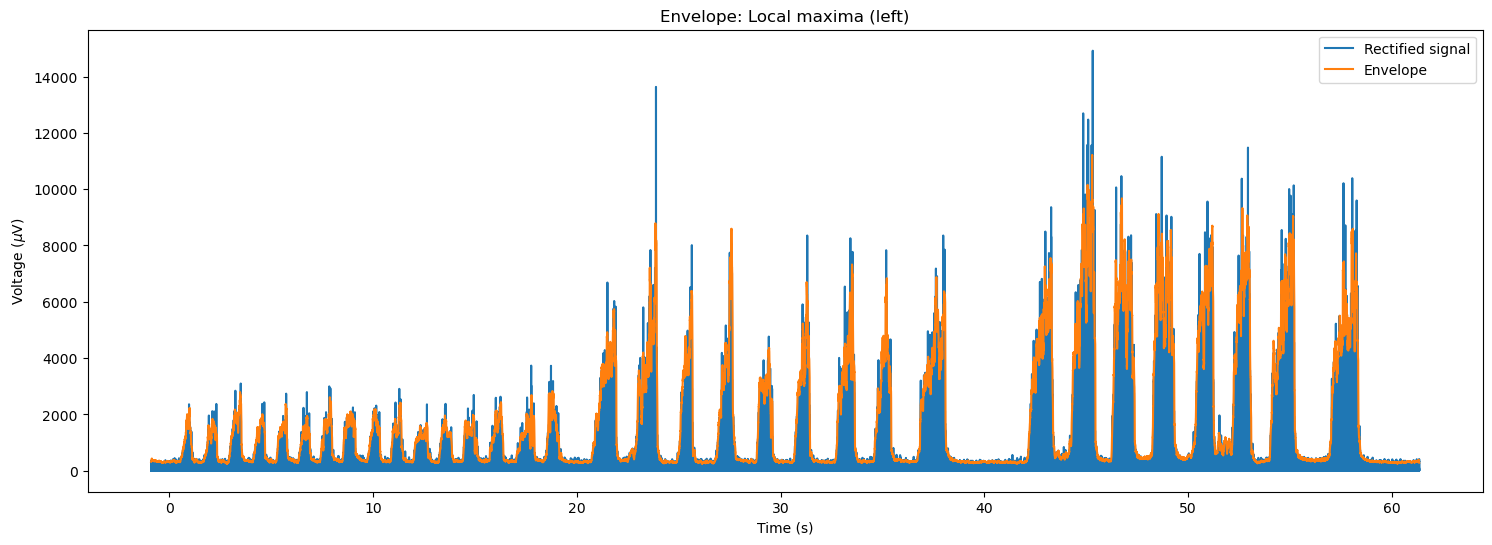

In [87]:
#Plot left hand envelope and EMG
plt.figure(figsize=(18,6))
#plt.plot(Time_a,intermitent_l,label="EMG")
plt.plot(Time_b,intermitent_r_abs,label="Rectified signal")
plt.plot(Time_b,3*intermitent_r_rms,label="Envelope")
plt.legend()
#plt.xlim(0,10)
plt.title("Envelope: Local maxima (left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

## 11.- Enveloped EMG signal vs Force signal

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/3970553941.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


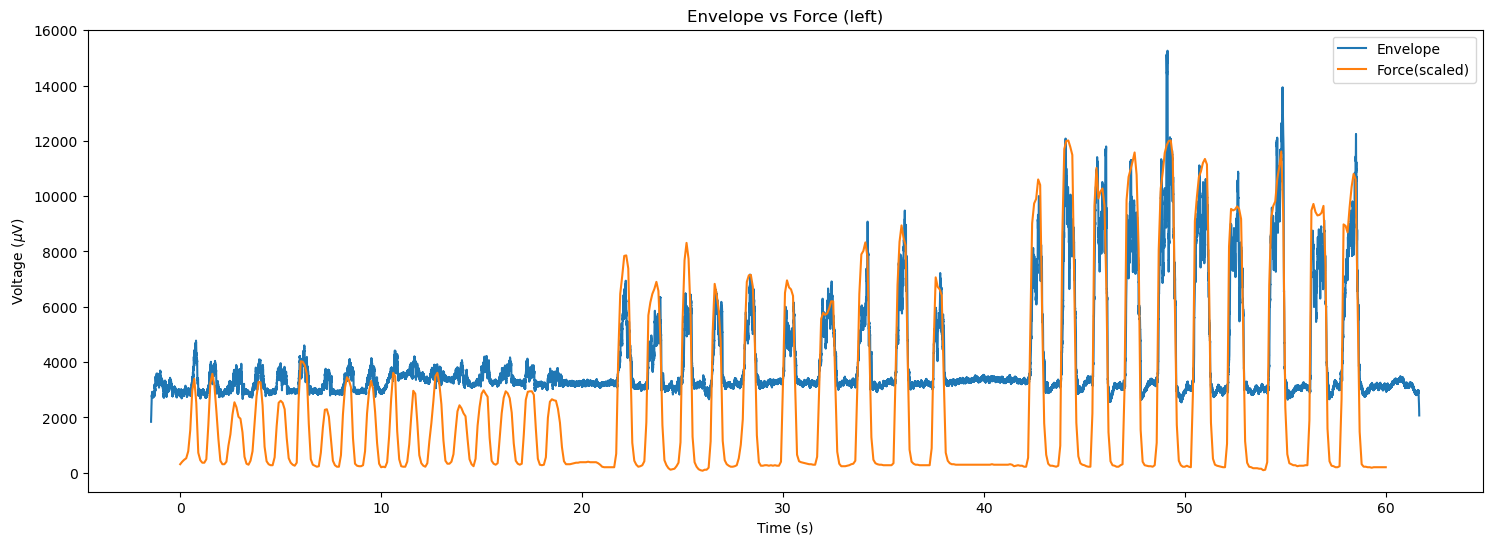

In [88]:
# Plot enveloped EMG and the Force signal
plt.figure(figsize=(18,6))
plt.plot(Time_a,5*intermitent_l_rms,label="Envelope")
plt.plot(f_time[:len(f_intermitent_l)],max(intermitent_l)*f_intermitent_l/max(f_intermitent_l),label="Force(scaled)")
#plt.scatter(segments_l[0][0],segments_l[0][1],label="AP beginning")
#plt.scatter(segments_l[1][0],segments_l[1][1],label="AP ending")
plt.legend()
plt.title("Envelope vs Force (left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
#plt.xlim(0,10)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/4245069051.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


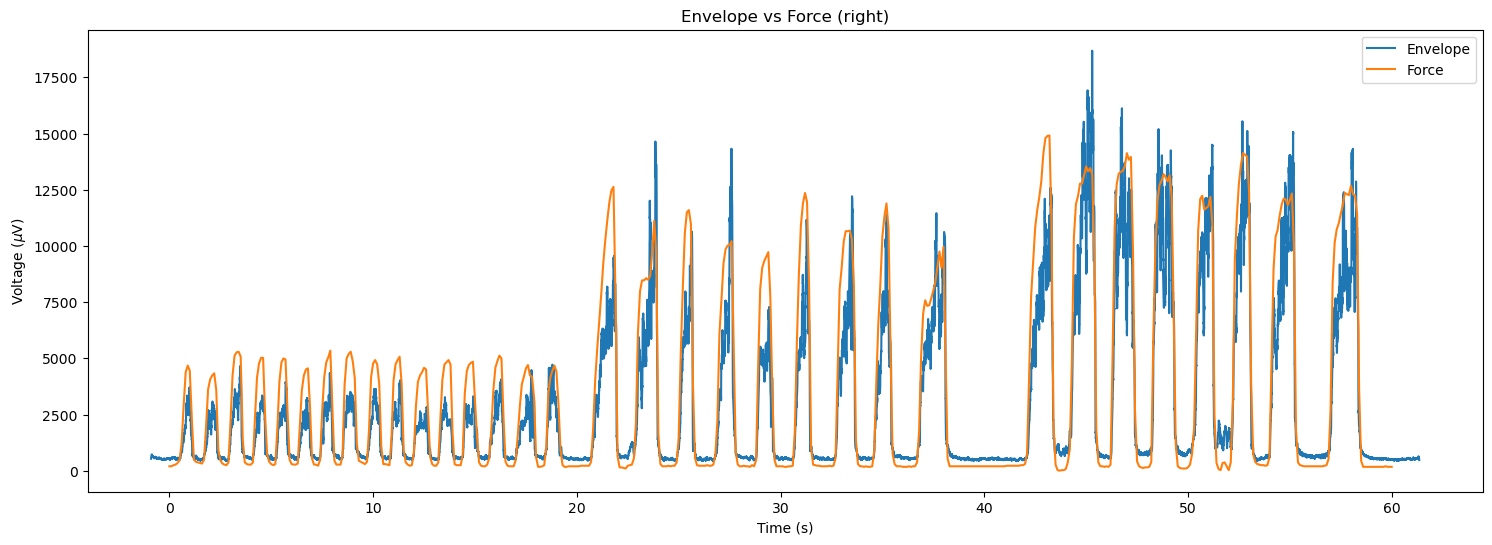

In [89]:
plt.figure(figsize=(18,6))
plt.plot(Time_b,5*intermitent_r_rms,label="Envelope")
plt.plot(f_time[:len(f_intermitent_r)],max(intermitent_r_env2)*f_intermitent_r/max(f_intermitent_r),label="Force")
plt.legend()
#plt.xlim(50,60)
plt.title("Envelope vs Force (right)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

## 12.- Base line compensation

In [90]:
baseLine_l=min(intermitent_l_rms[6000:len(intermitent_l_rms)-6000])

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/3694424088.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


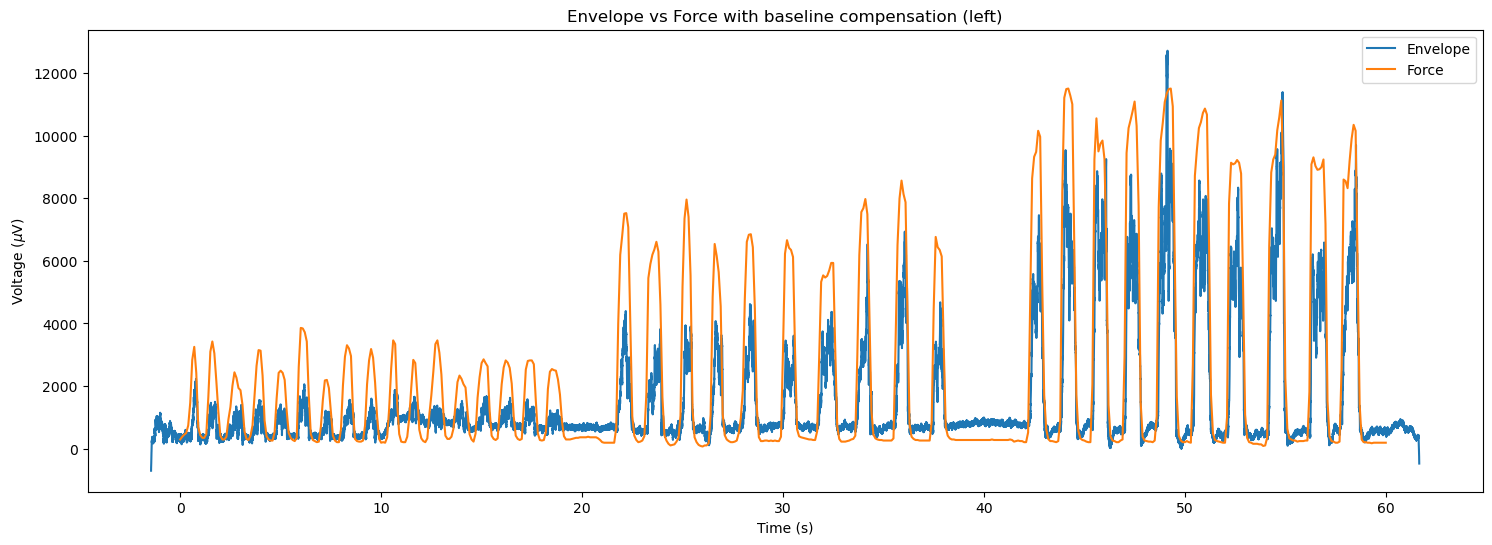

In [91]:
plt.figure(figsize=(18,6))
plt.plot(Time_a,5*(intermitent_l_rms-baseLine_l),label="Envelope")
plt.plot(f_time[:len(f_intermitent_l)],max(intermitent_l_env2-baseLine_l)*f_intermitent_l/max(f_intermitent_l),label="Force")
plt.legend()
#plt.xlim(20,30)
plt.title("Envelope vs Force with baseline compensation (left)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

In [92]:
baseLine_r=min(intermitent_r_rms[6000:len(intermitent_r_rms)-6000])

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/1274183397.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu$V)')


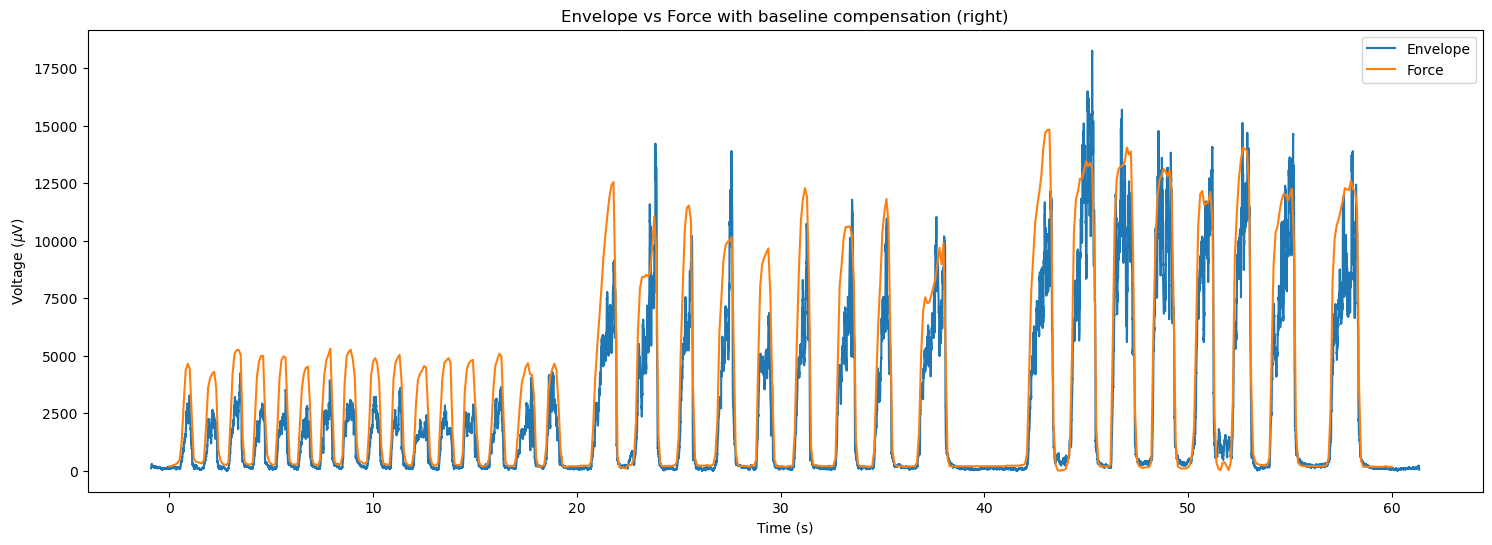

In [93]:
plt.figure(figsize=(18,6))
plt.plot(Time_b,5*(intermitent_r_rms-baseLine_r),label="Envelope")
plt.plot(f_time[:len(f_intermitent_r)],max(intermitent_r_env2-baseLine_r)*f_intermitent_r/max(f_intermitent_r),label="Force")
plt.legend()
#plt.xlim(20,30)
plt.title("Envelope vs Force with baseline compensation (right)")
plt.xlabel("Time (s)")
plt.ylabel('Voltage ($\mu$V)')
plt.show()

Notice that with the MSR method we have borderline effects in the left hand, as well as deformations in the resting periods, which amplifies noise. So, we will use the envelope obtained with the method 2: local maxima. The method 2 doesn't affect the borders of each impulse and helps to keep the amplitude of the action potential constant. 

Despite the fact that the MSR method proved to be useless in this case, it is very usefull when enveloping EEG signal or fatigue EMG signals. It is important to know the limitations of each technique we use, as well as their pros and cons. 

## 13.- Impulse amplitude: EMG vs Force

In [94]:
# Define a new array of corrected envelopes
intermitent_l_c=intermitent_l_env2-baseLine_l
f_time_l=f_time[:len(f_intermitent_l)]
intermitent_r_c=intermitent_r_env2-baseLine_r
f_time_r=f_time[:len(f_intermitent_r)]

In [95]:
# Segmentation of the EMG envelope by thresholds
segments_l_c=segments_th(time_l_env,intermitent_l_c,threshold=500)
segments_r_c=segments_th(time_r_env,intermitent_r_c,threshold=500)

In [96]:
# For every segment of the EMG envelope, we append the maximum value to the array intermitent_l_max
j=0
start=False
intermitent_l_max=[]
for i in range(0,len(time_l_env)):
    if j==len(segments_l[1][0]):
        break
    if start==True:
        if time_l_env[i]>segments_l[1][0][j]:
            #print(index,i)
            intermitent_l_max.append(max(intermitent_l_c[index:i]))
            start=False
            j+=1
    if start==False:
        if j!=37:
            if time_l_env[i]>segments_l[0][0][j]:
                start=True
                index=i

In [97]:
# For every segment of the EMG envelope, we append the maximum value to the array intermitent_r_max
j=0
start=False
intermitent_r_max=[]
for i in range(0,len(time_r_env)):
    if j==len(segments_l[1][0]):
        break
    if start==True:
        if time_r_env[i]>segments_r[1][0][j]:
            #print(index,i)
            intermitent_r_max.append(max(intermitent_r_c[index:i]))
            start=False
            j+=1
    if start==False:
        if j!=33:
            if time_r_env[i]>segments_r[0][0][j]:
                start=True
                index=i

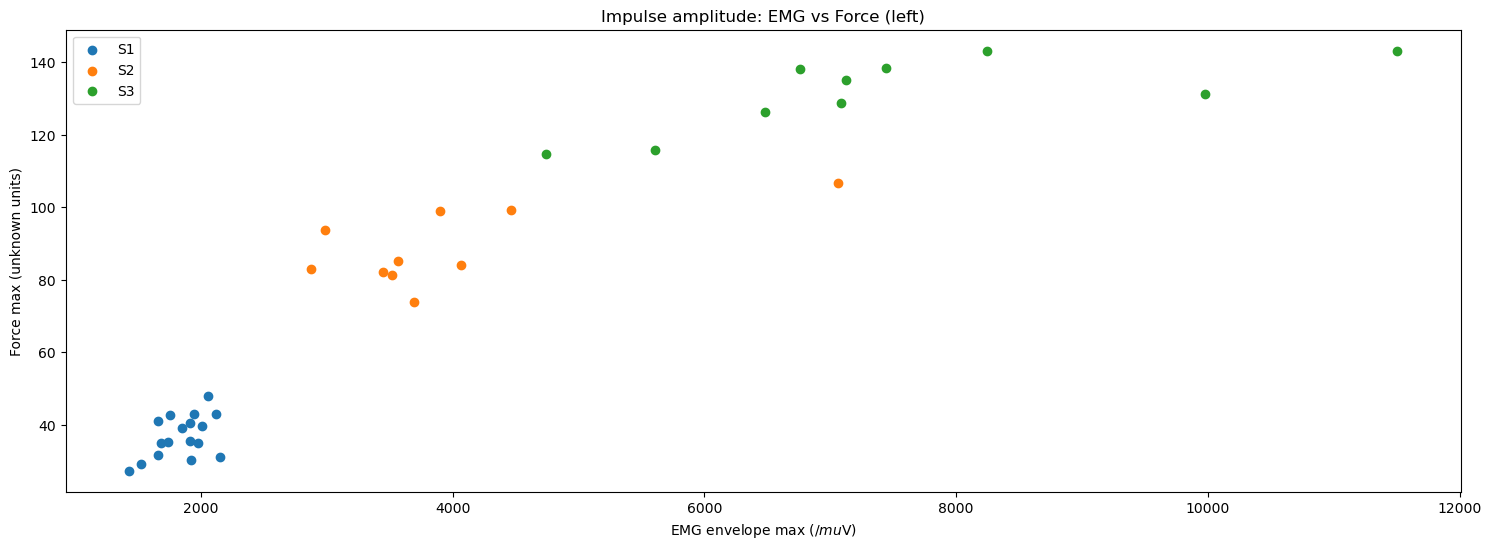

In [98]:
plt.figure(figsize=(18,6))
plt.scatter(intermitent_l_max[:17],f_intermitent_l_max[:17],label="S1")
plt.scatter(intermitent_l_max[17:27],f_intermitent_l_max[17:27],label="S2")
plt.scatter(intermitent_l_max[27:],f_intermitent_l_max[27:],label="S3")
plt.legend()
plt.title("Impulse amplitude: EMG vs Force (left)")
plt.xlabel("EMG envelope max ($/mu$V)")
plt.ylabel("Force max (unknown units)")
plt.show;

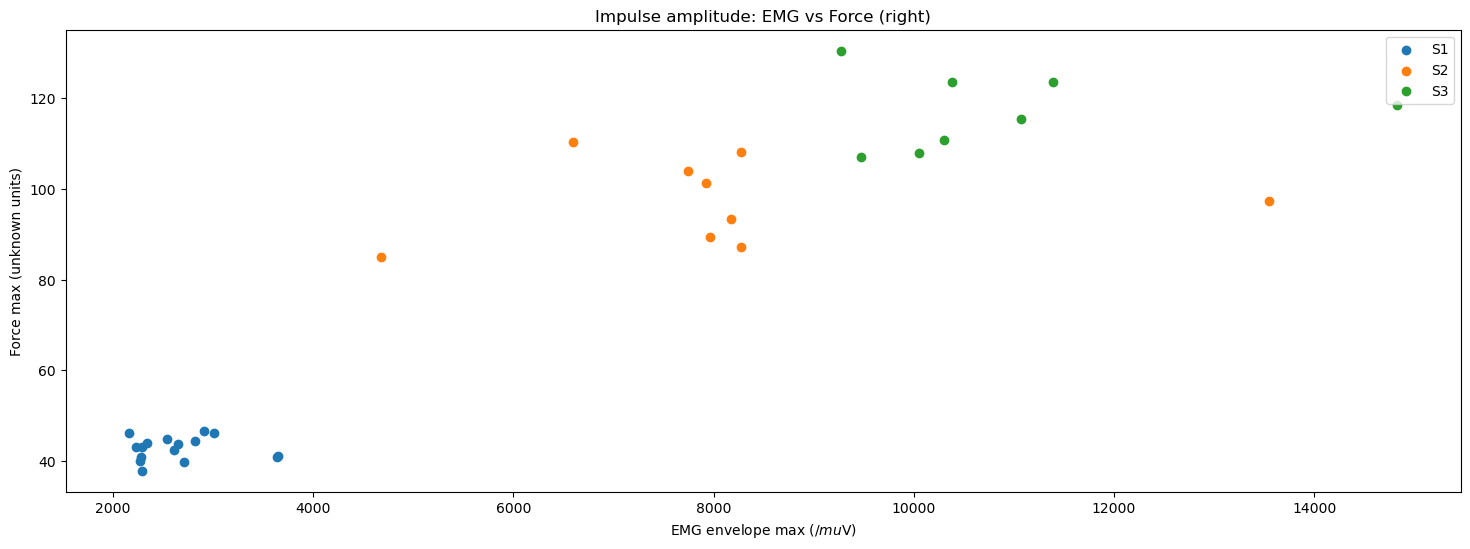

In [99]:
plt.figure(figsize=(18,6))
plt.scatter(intermitent_r_max[:16],f_intermitent_r_max[:16],label="S1")
plt.scatter(intermitent_r_max[16:25],f_intermitent_r_max[16:25],label="S2")
plt.scatter(intermitent_r_max[25:],f_intermitent_r_max[25:],label="S3")
plt.legend()
plt.title("Impulse amplitude: EMG vs Force (right)")
plt.xlabel("EMG envelope max ($/mu$V)")
plt.ylabel("Force max (unknown units)")
plt.show;
plt.show;

## 14.- Curve fitting
As it can be seen in the previous graphs, the force produced has a logarithmic(ish) response to the amplitude of the action potential in the muscles that produced it. So now we will try to fit a logarithmic function to the curve.

In [100]:
#First we define the log function.
def logarithmic(x,a,b,c):
    return a*np.log(x + b)+c

In the previous function we have 3 trainable parameters: a, b and c

In [101]:
# these are the same as the scipy defaults
initialParameters = np.array([1.0, -500.0, -300.0])

In [102]:
# curve fit the test data
fittedParameters_l, pcov_l = curve_fit(logarithmic, intermitent_l_max, f_intermitent_l_max, initialParameters)

/var/folders/n6/xcj3j4lx6lb8r4wj_86v5cnr0000gn/T/ipykernel_5973/1045232656.py:3: RuntimeWarning: invalid value encountered in log
  return a*np.log(x + b)+c


In [103]:
modelPredictions_l = logarithmic(intermitent_l_max, *fittedParameters_l) 

absError_l = modelPredictions_l - f_intermitent_l_max

SE_l = np.square(absError_l) # squared errors
MSE_l = np.mean(SE_l) # mean squared errors
RMSE_l = np.sqrt(MSE_l) # Root Mean Squared Error, RMSE
Rsquared_l = 1.0 - (np.var(absError_l) / np.var(f_intermitent_l_max))

print('Parameters:', fittedParameters_l)
print('RMSE:', RMSE_l)
print('R-squared:', Rsquared_l)

Parameters: [  54.31161914 -519.81028461 -350.89252246]
RMSE: 9.372192092606587
R-squared: 0.9465566888298268


In [104]:
def bubblesort(elements):
    elements2=np.zeros([2,len(elements[0])])
    # Looping from size of array from last index[-1] to index [0]
    cont=0
    for i in range(0,len(elements[0])):
        for j in range(0,len(elements[0])):
            if elements[0,j]==min(elements[0]):
                elements2[:,cont]=elements[:,j]
                elements[0,j]=max(elements[0])+1
                elements[1,j]=0
                cont+=1
                break
                
    return elements2

In [107]:
PA_fit_l=np.array([intermitent_l_max,modelPredictions_l])

In [108]:
PA_fit_l=bubblesort(PA_fit_l)

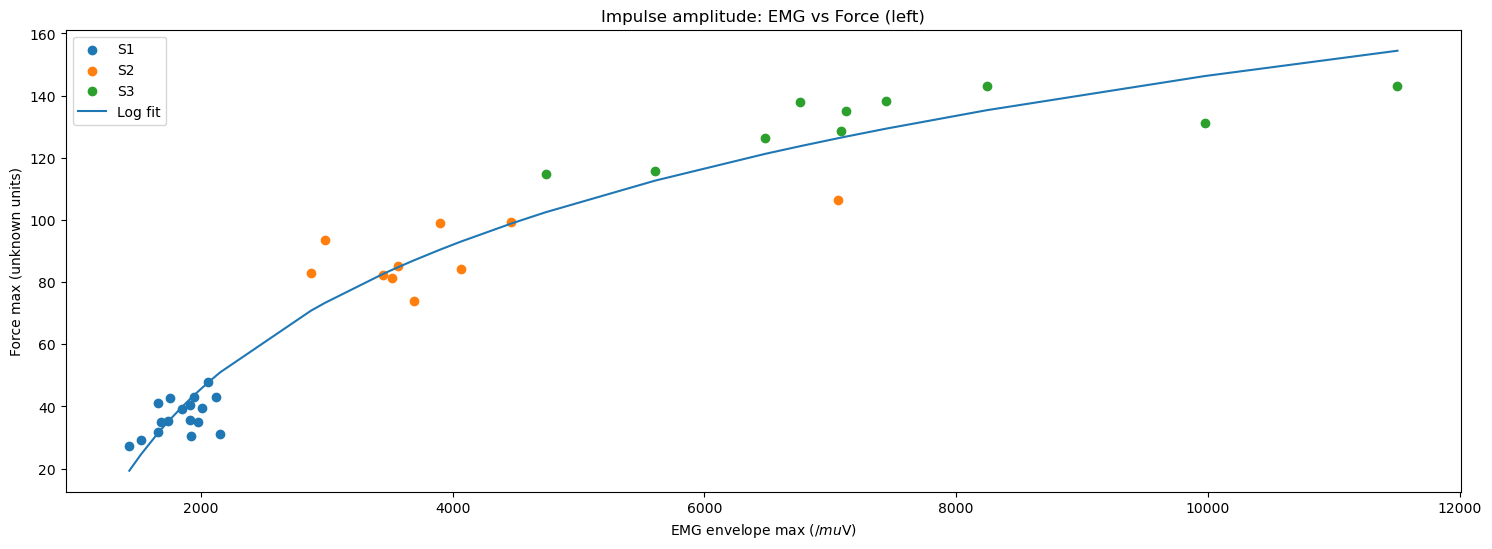

In [109]:
plt.figure(figsize=(18,6))
plt.scatter(intermitent_l_max[:17],f_intermitent_l_max[:17],label="S1")
plt.scatter(intermitent_l_max[17:27],f_intermitent_l_max[17:27],label="S2")
plt.scatter(intermitent_l_max[27:],f_intermitent_l_max[27:],label="S3")
plt.plot(PA_fit_l[0],PA_fit_l[1],label="Log fit")
plt.legend()
plt.title("Impulse amplitude: EMG vs Force (left)")
plt.xlabel("EMG envelope max ($/mu$V)")
plt.ylabel("Force max (unknown units)")
plt.show;

In [111]:
modelPredictions_r = logarithmic(intermitent_r_max, *fittedParameters_r) 

absError_r = modelPredictions_r - f_intermitent_r_max

SE_r = np.square(absError_r) # squared errors
MSE_r = np.mean(SE_r) # mean squared errors
RMSE_r = np.sqrt(MSE_r) # Root Mean Squared Error, RMSE
Rsquared_r = 1.0 - (np.var(absError_r) / np.var(f_intermitent_r_max))

print('Parameters:', fittedParameters_r)
print('RMSE:', RMSE_r)
print('R-squared:', Rsquared_r)

Parameters: [  47.92615244   21.07684969 -332.47485898]
RMSE: 10.640590096617057
R-squared: 0.8976560657623052


In [112]:
PA_fit_r=np.array([intermitent_r_max,modelPredictions_r])

In [113]:
PA_fit_r=bubblesort(PA_fit_r)

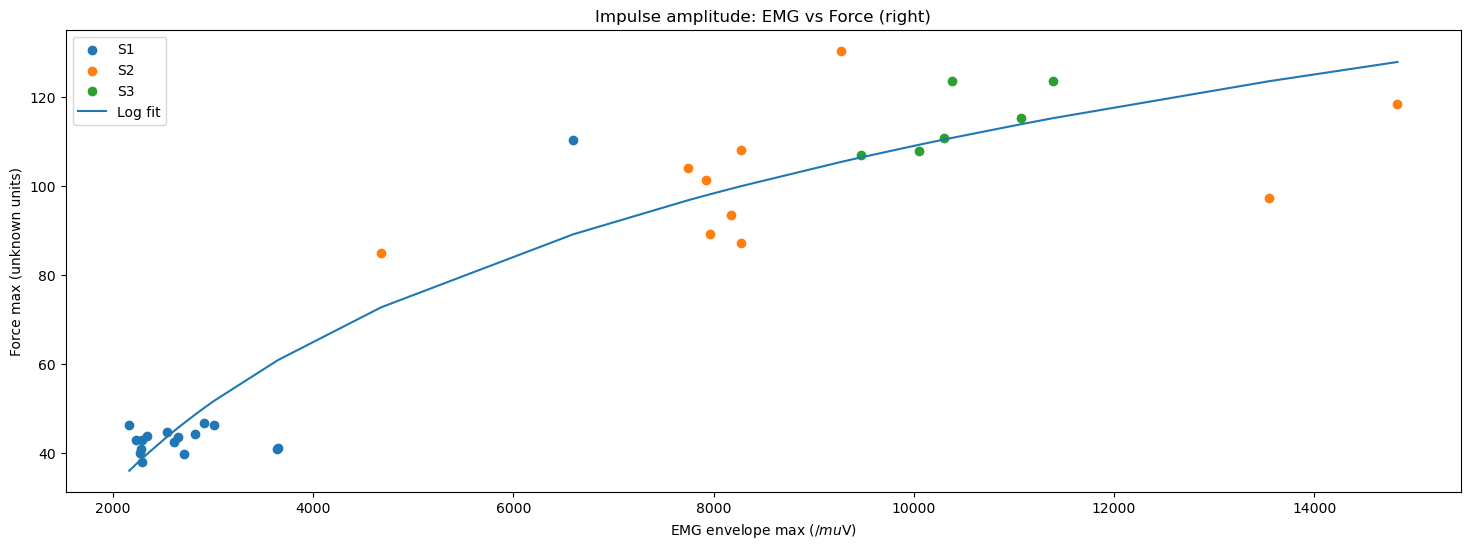

In [114]:
plt.figure(figsize=(18,6))
plt.scatter(intermitent_r_max[:17],f_intermitent_r_max[:17],label="S1")
plt.scatter(intermitent_r_max[17:27],f_intermitent_r_max[17:27],label="S2")
plt.scatter(intermitent_r_max[27:],f_intermitent_r_max[27:],label="S3")
plt.plot(PA_fit_r[0],PA_fit_r[1],label="Log fit")
plt.legend()
plt.title("Impulse amplitude: EMG vs Force (right)")
plt.xlabel("EMG envelope max ($/mu$V)")
plt.ylabel("Force max (unknown units)")
plt.show;